### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.  

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.  

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import statsmodels.api as sm

In [3]:
plt.rcParams["figure.figsize"] = [20,10]

In [4]:
# Importing all datasets
lead_data = pd.read_csv(r"D:\NC\Trail_DS\Lead Scoring CS\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
original_data = lead_data.copy()

### Step 2: Inspecting the Dataframe and Cleaning the data

In [6]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [7]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [9]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * lead_data.isnull().sum()/len(lead_data)
round(colwise_percent_missingvalues,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Let's consider the columns one by one for missing values

In [10]:
#Lead Quality has almost 52 percent missing values
lead_data["Lead Quality"].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

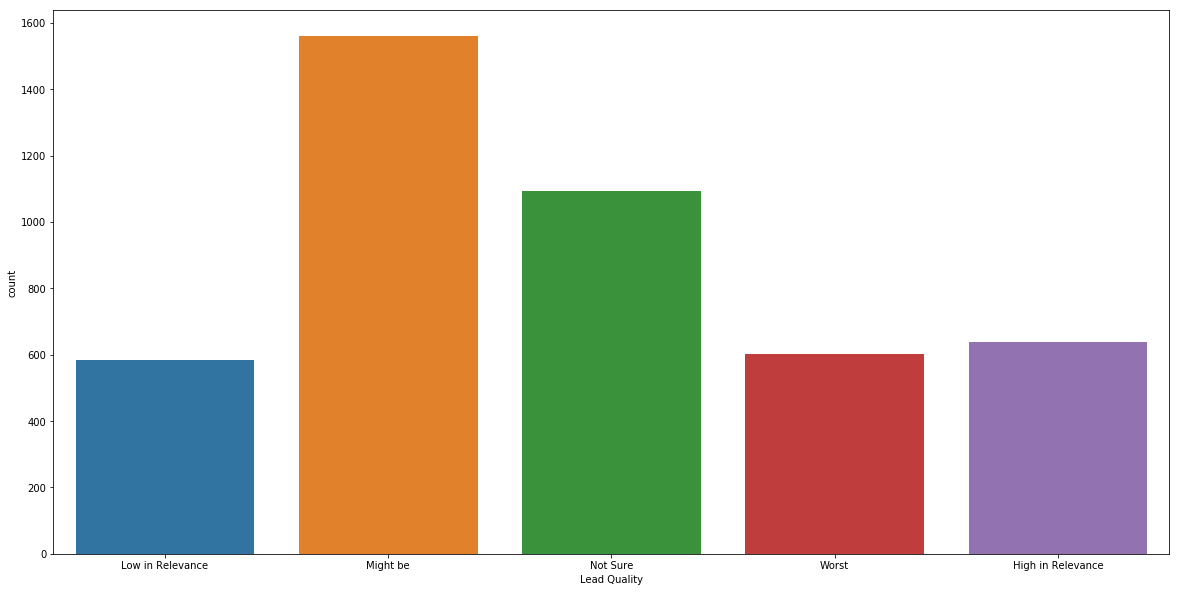

In [11]:
sns.countplot(x="Lead Quality", data=lead_data)

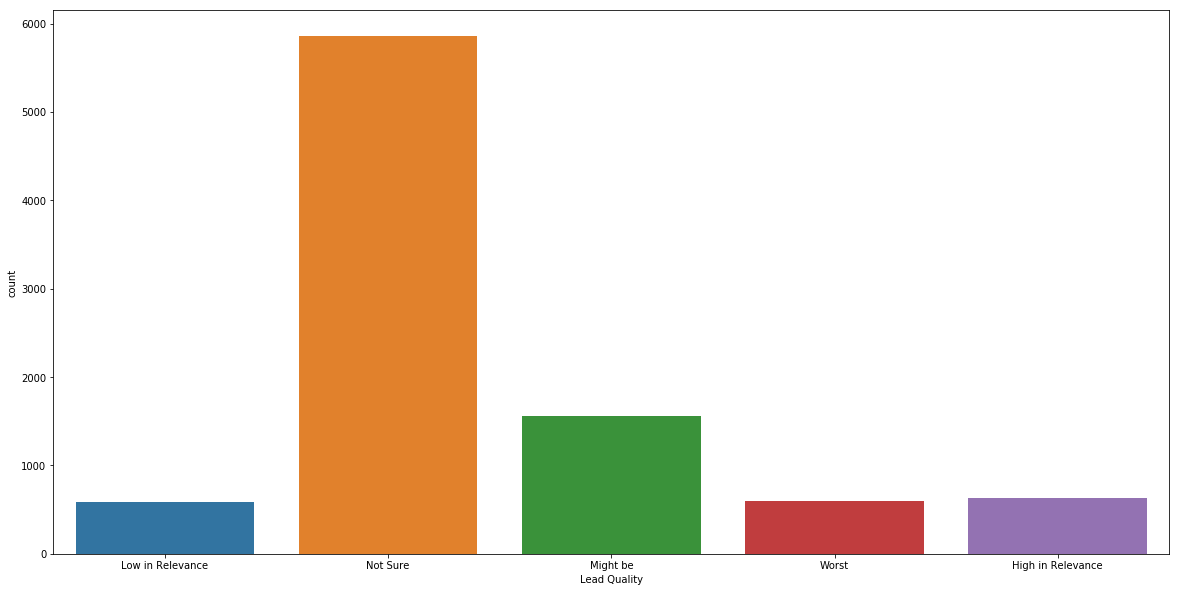

In [12]:
#By looking at the unique values, we can impute the null values with 'Not Sure'
lead_data["Lead Quality"].replace(np.nan,'Not Sure',inplace=True)
sns.countplot(x="Lead Quality", data=lead_data)

In [13]:
#Asymmetrique Activity Index has almost 46 percent missing values
lead_data["Asymmetrique Activity Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [14]:
#Asymmetrique Profile Index has almost 46 percent missing values
lead_data["Asymmetrique Profile Index"].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

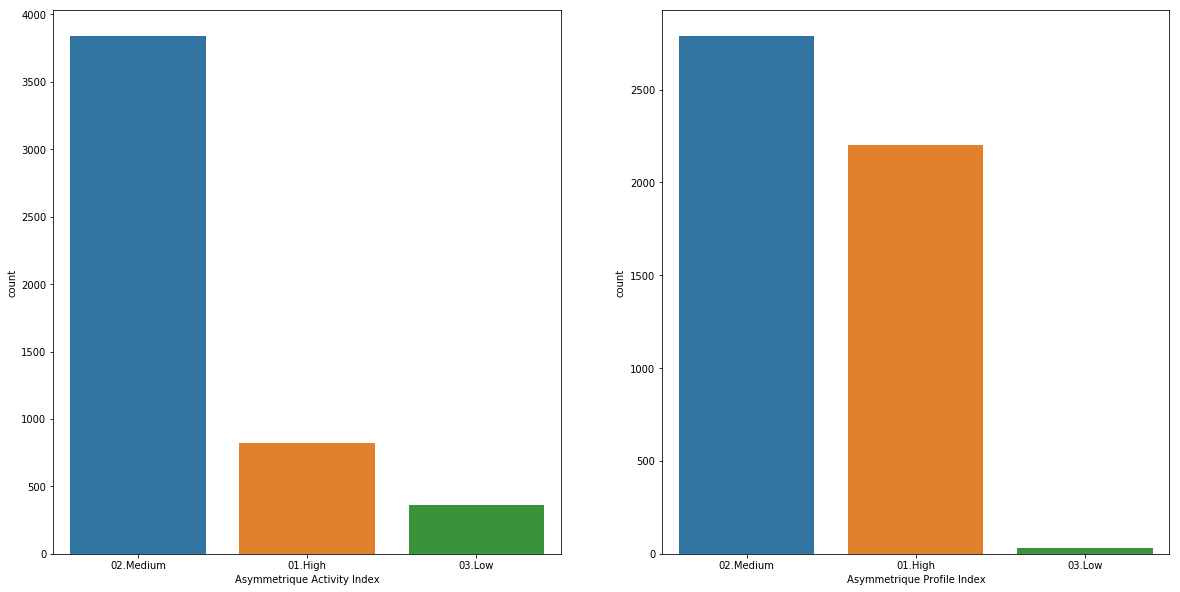

In [15]:
plt.subplot(1,2,1)
sns.countplot(x="Asymmetrique Activity Index", data=lead_data)
plt.subplot(1,2,2)
sns.countplot(x="Asymmetrique Profile Index", data=lead_data)
plt.show()

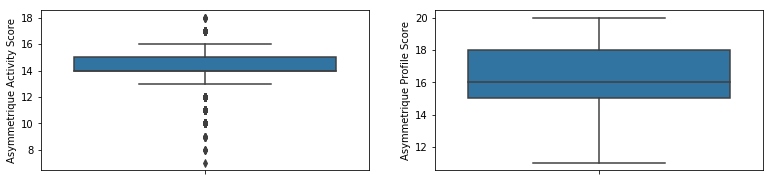

In [16]:
#Asymmetrique Activity Score and Asymmetrique Profile Score has almost 46 percent missing values
plt.subplot(3,3,1)
sns.boxplot(y = 'Asymmetrique Activity Score', data = lead_data)
plt.subplot(3,3,2)
sns.boxplot(y = 'Asymmetrique Profile Score', data = lead_data)
plt.show()

In [17]:
#Looks like we cannot impute Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score
#So let's remove these columns as there are 46 percent null values which is very high
colstodroplst = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score'
                , 'Asymmetrique Profile Score']
lead_data = lead_data.drop(colstodroplst, axis = 1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Ringing,Not Sure,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [18]:
#Tags has almost 36 percent missing values
lead_data["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

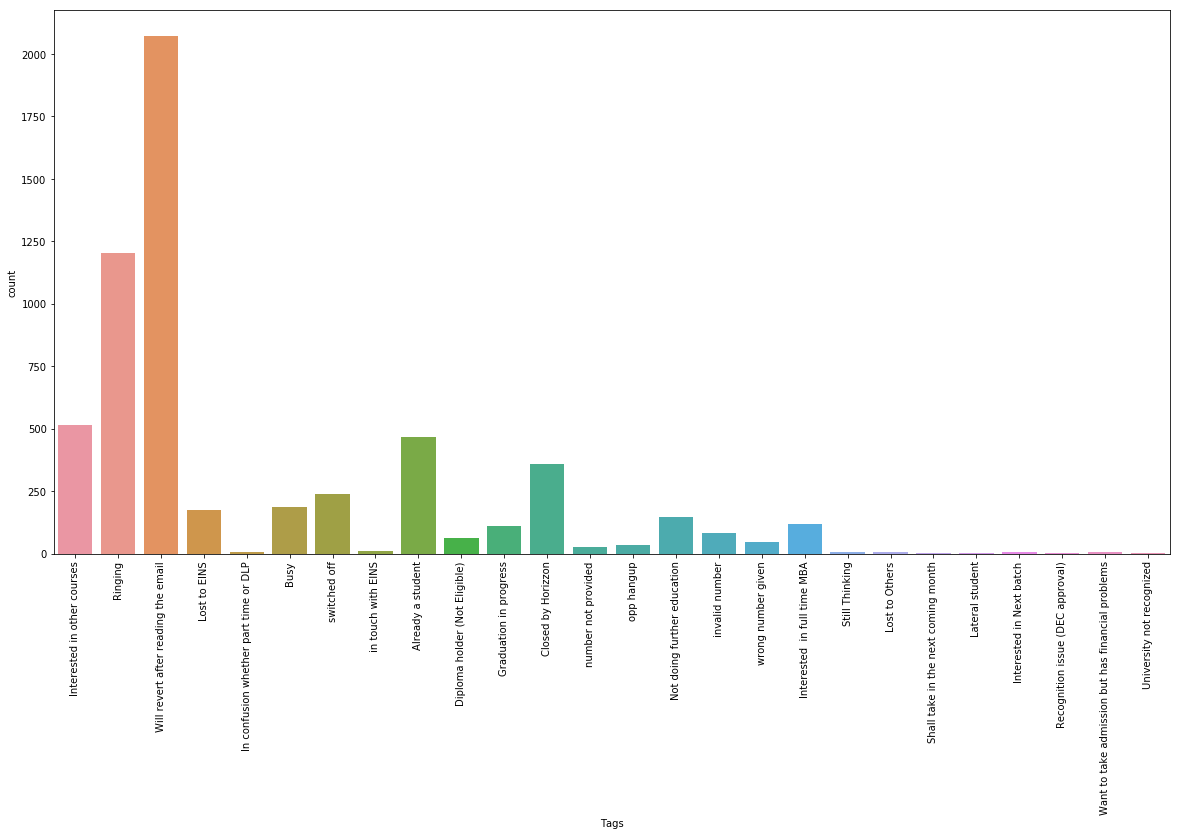

In [19]:
sns.countplot(x="Tags", data=lead_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

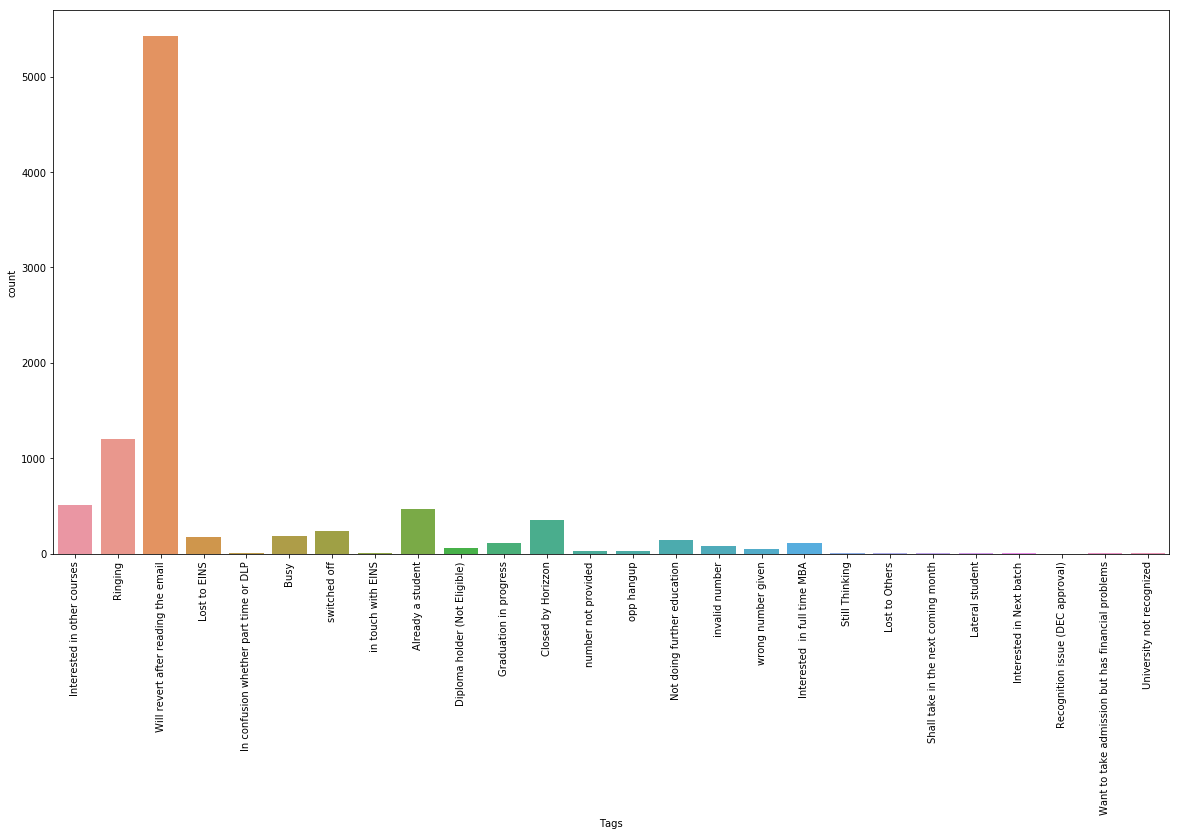

In [20]:
#Since majority of the values in 'Tags' column has 'Will revert after reading the email', we can impute the null values with the same.
lead_data["Tags"].replace(np.nan,'Will revert after reading the email',inplace=True)
sns.countplot(x="Tags", data=lead_data)
plt.xticks(rotation = 90)

In [21]:
#Lead Profile has almost 29 percent missing values
lead_data["Lead Profile"].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

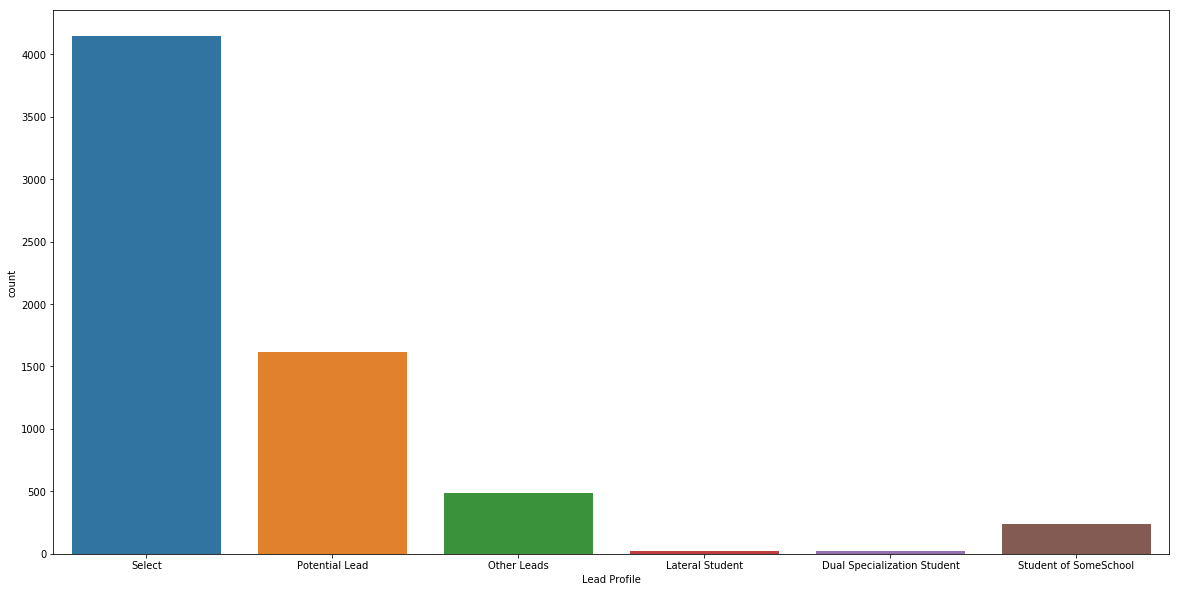

In [22]:
sns.countplot(x="Lead Profile", data=lead_data)

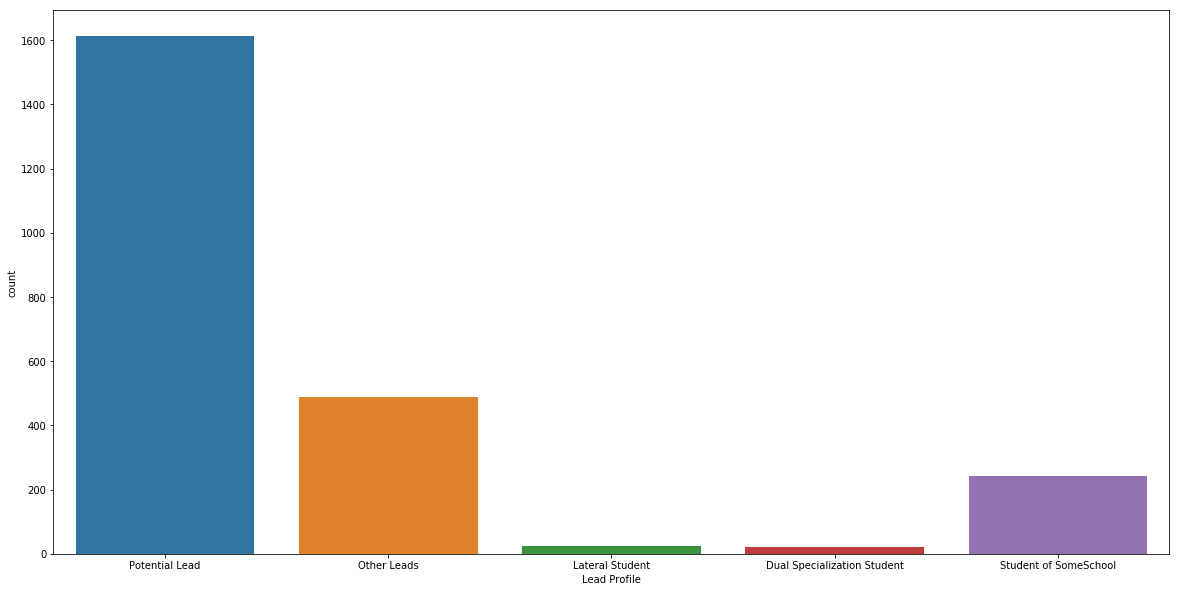

In [23]:
#Here 'Select' is not a value, looks like the user has missed a field. Let's replace 'Select' with null values and check the percentage of missing values.
lead_data["Lead Profile"].replace('Select', np.nan,inplace=True)
sns.countplot(x="Lead Profile", data=lead_data)

In [24]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * lead_data.isnull().sum()/len(lead_data)
round(colwise_percent_missingvalues,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [25]:
#Now Lead Profile has almost 74 percent missing values, which is very high, so let's drop the column
lead_data = lead_data.drop('Lead Profile', axis = 1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [26]:
#'What matters most to you in choosing a course' has almost 29 percent missing values
lead_data["What matters most to you in choosing a course"].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

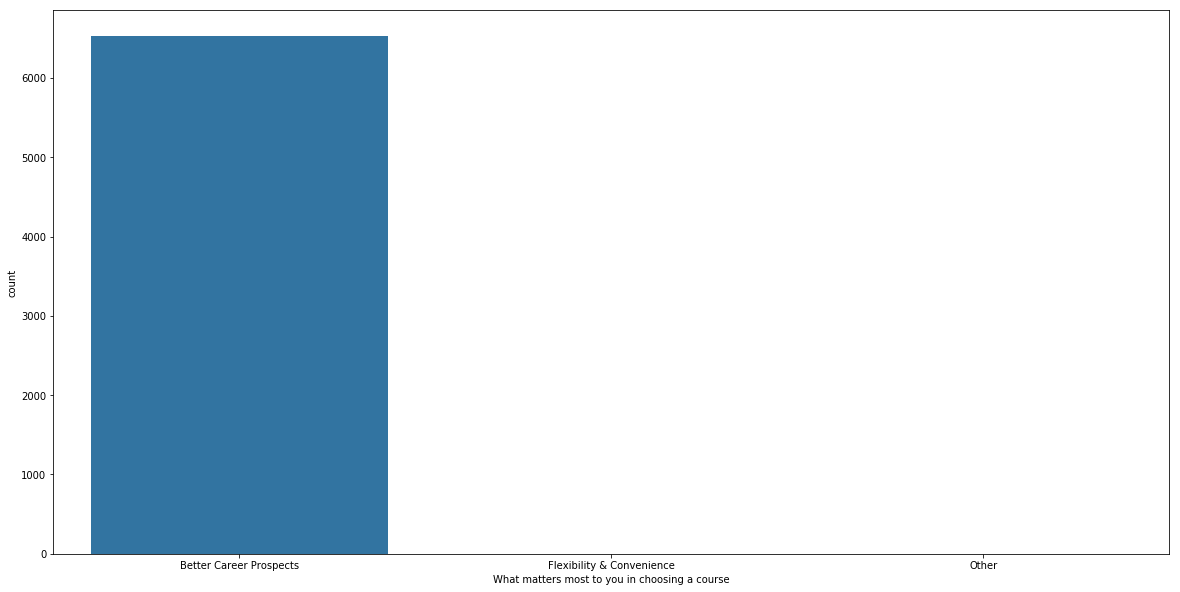

In [27]:
sns.countplot(x="What matters most to you in choosing a course", data=lead_data)

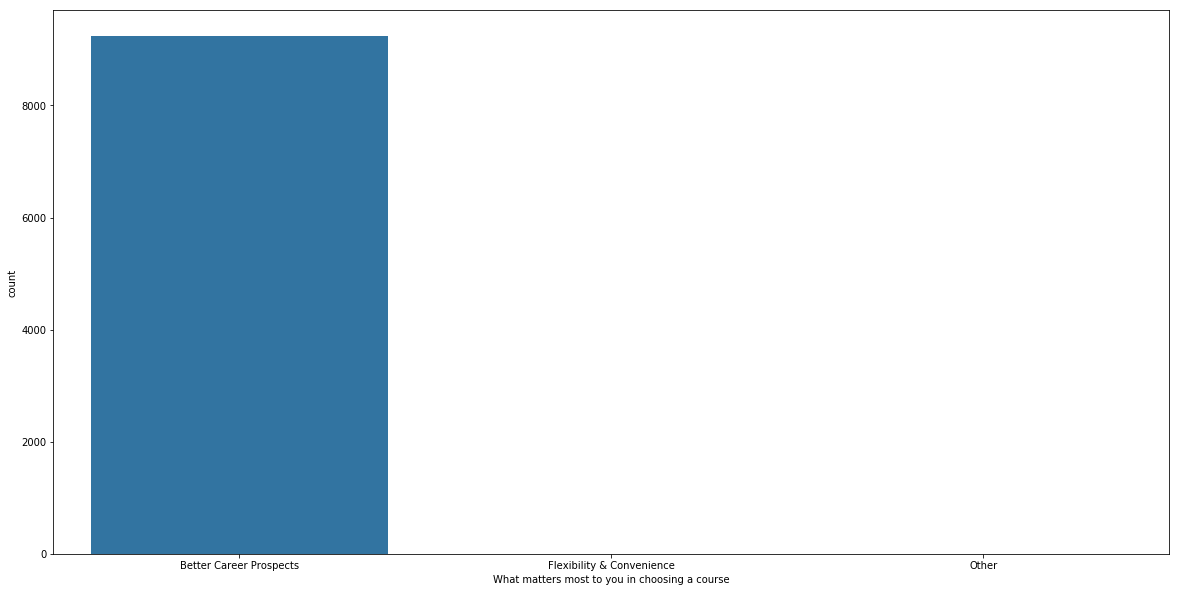

In [28]:
#Since majority of the values in 'What matters most to you in choosing a course' column has 'Better Career Prospects', we can impute the null values with the same.
lead_data["What matters most to you in choosing a course"].replace(np.nan,'Better Career Prospects',inplace=True)
sns.countplot(x="What matters most to you in choosing a course", data=lead_data)

In [29]:
#'What is your current occupation' has almost 29 percent missing values
lead_data["What is your current occupation"].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

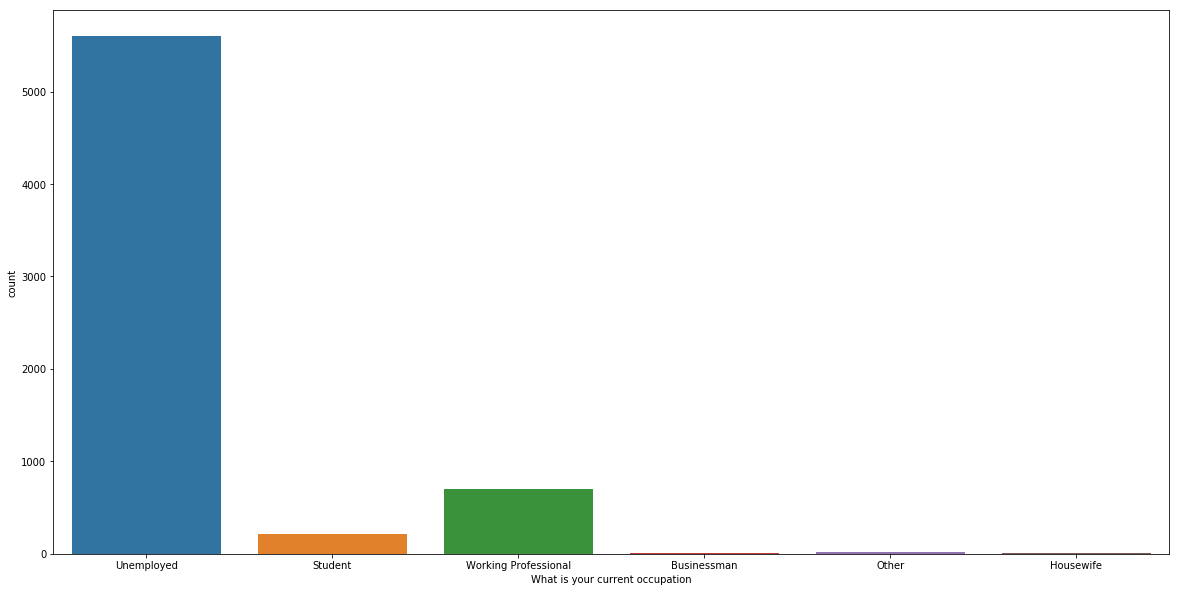

In [30]:
sns.countplot(x="What is your current occupation", data=lead_data)

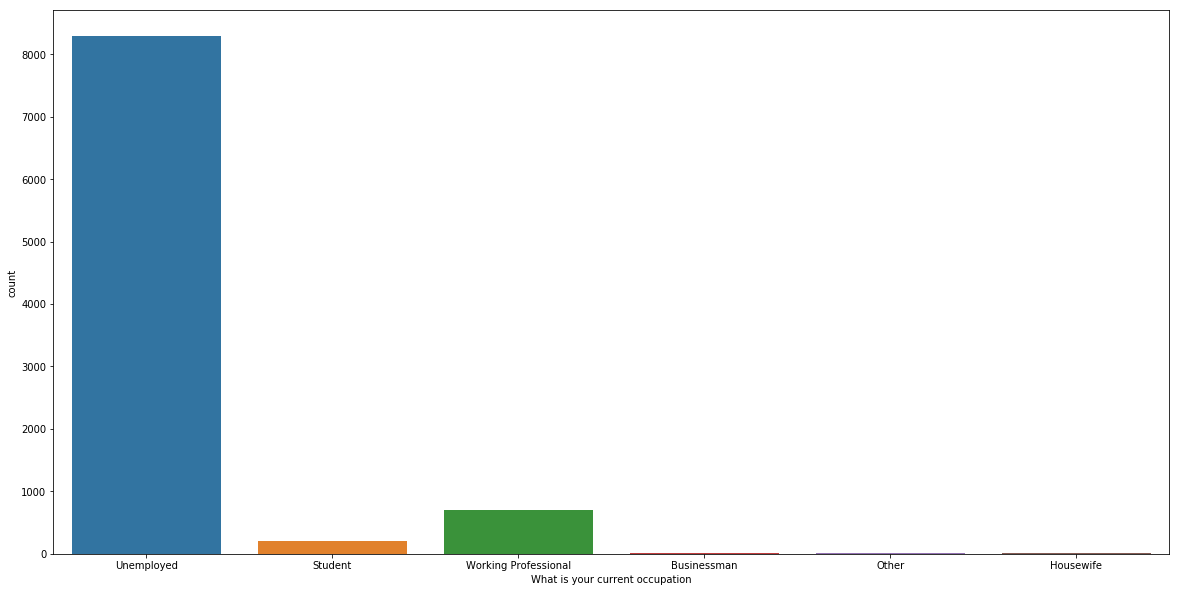

In [31]:
#Since majority of the values in 'What is your current occupation' column has 'Unemployed', we can impute the null values with the same.
lead_data["What is your current occupation"].replace(np.nan,'Unemployed',inplace=True)
sns.countplot(x="What is your current occupation", data=lead_data)

In [32]:
#'Country' has almost 27 percent missing values
lead_data["Country"].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

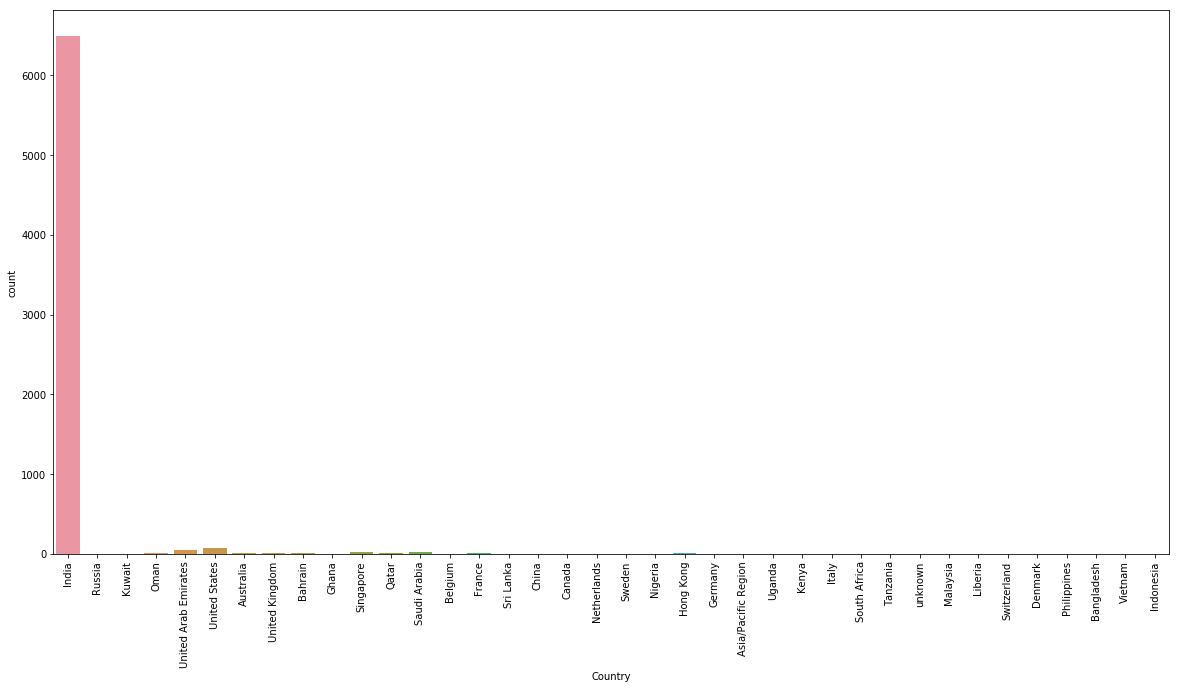

In [33]:
sns.countplot(x="Country", data=lead_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

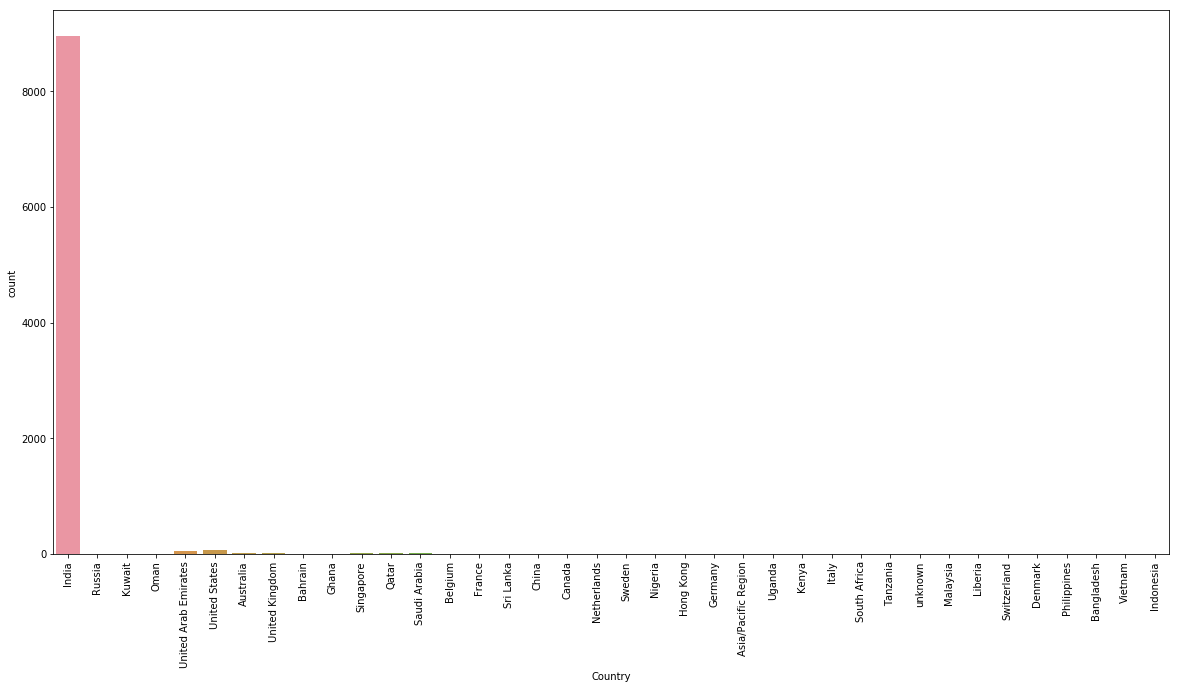

In [34]:
#Since majority of the values in 'Country' column has 'India', we can impute the null values with the same.
lead_data["Country"].replace(np.nan,'India',inplace=True)
sns.countplot(x="Country", data=lead_data)
plt.xticks(rotation = 90)

In [35]:
#'How did you hear about X Education' has almost 24 percent missing values
lead_data["How did you hear about X Education"].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

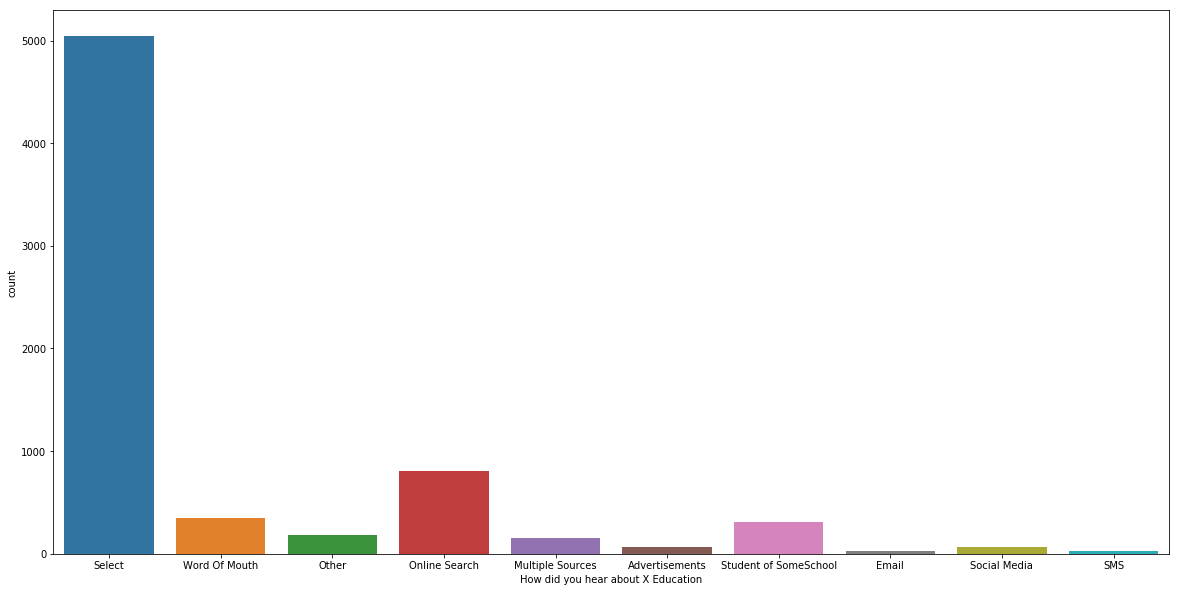

In [36]:
sns.countplot(x="How did you hear about X Education", data=lead_data)

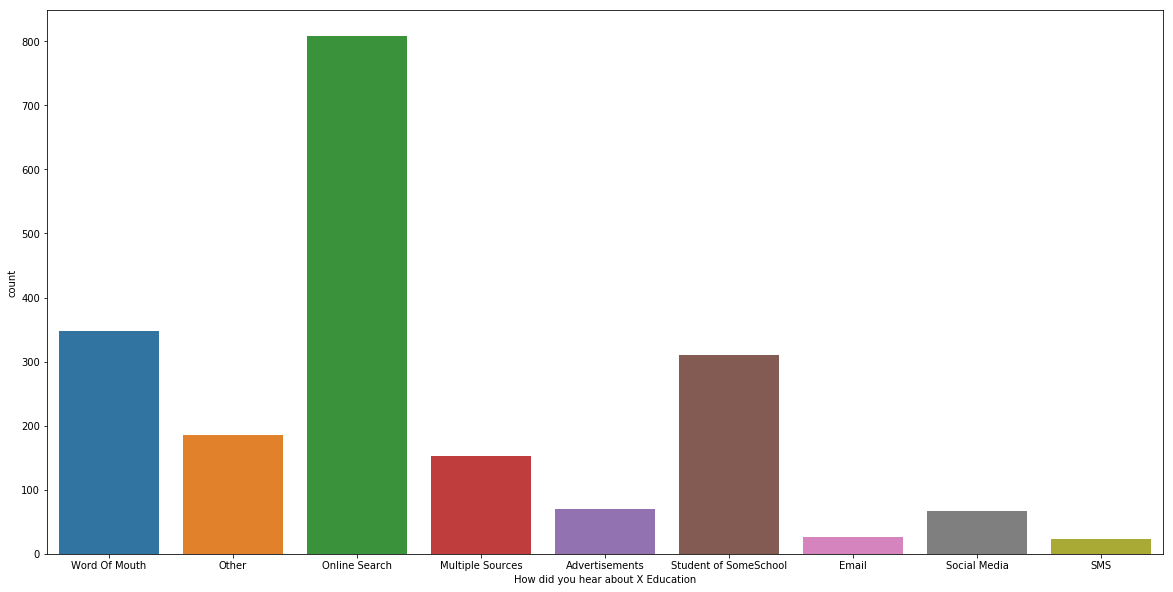

In [37]:
#Here 'Select' is not a value, looks like the user has missed a field. Let's replace 'Select' with null values and check the percentage of missing values.
lead_data["How did you hear about X Education"].replace('Select', np.nan,inplace=True)
sns.countplot(x="How did you hear about X Education", data=lead_data)

In [38]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * lead_data.isnull().sum()/len(lead_data)
round(colwise_percent_missingvalues,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                   15.56
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [39]:
#Now 'How did you hear about X Education' column has almost 79 percent missing values, which is very high, so let's drop the column
lead_data = lead_data.drop('How did you hear about X Education', axis = 1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [40]:
#'Specialization' has almost 16 percent missing values
lead_data["Specialization"].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

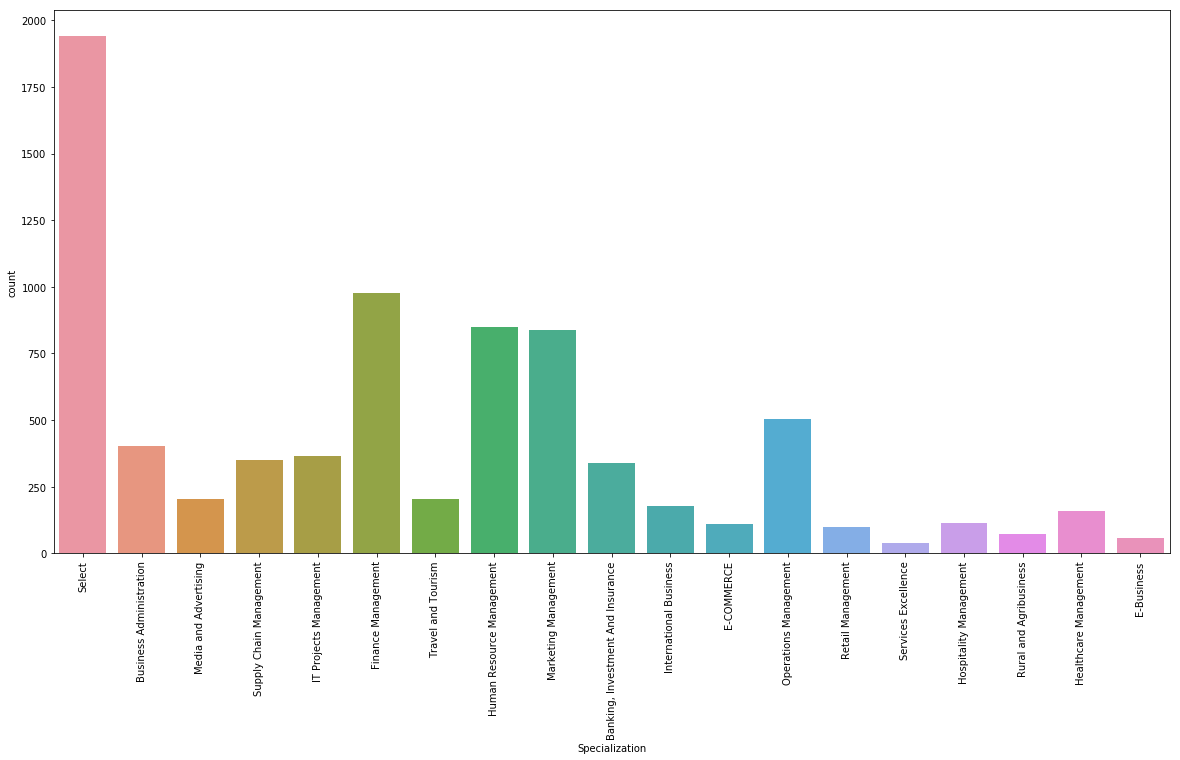

In [41]:
sns.countplot(x="Specialization", data=lead_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

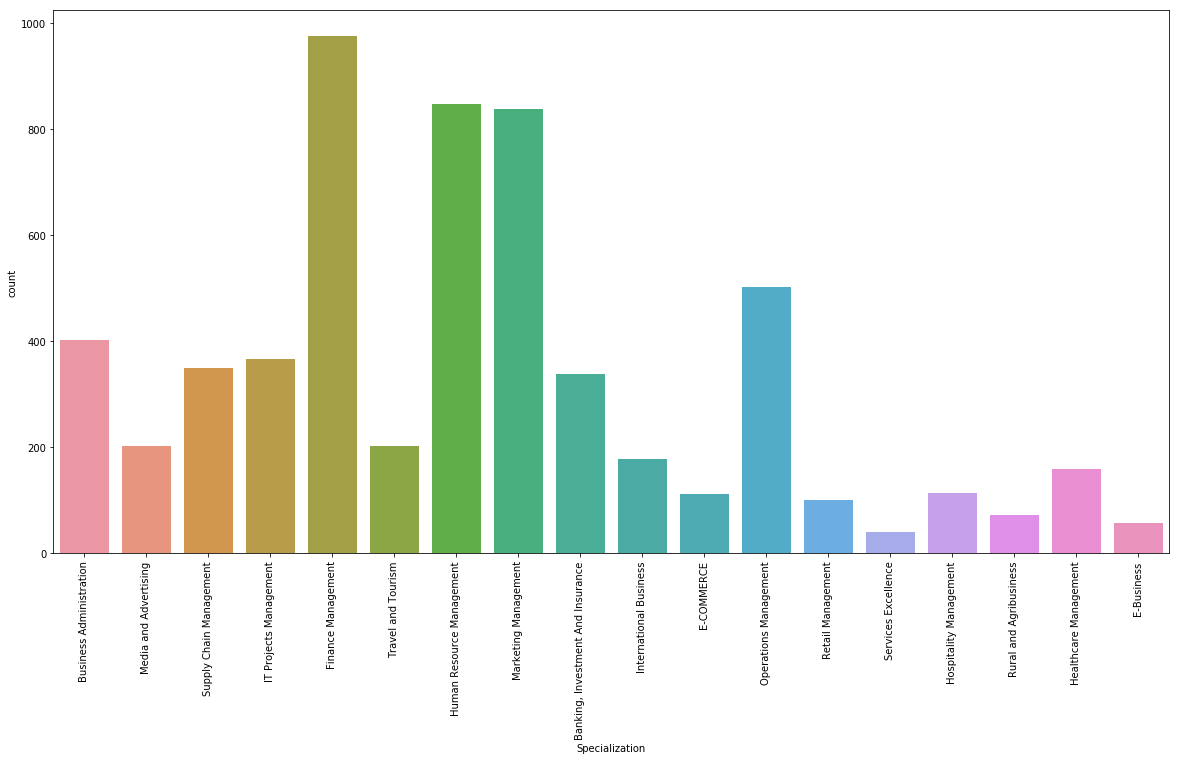

In [42]:
#Here 'Select' is not a value, looks like the user has missed a field. Let's replace 'Select' with null values.
lead_data["Specialization"].replace('Select', np.nan,inplace=True)
sns.countplot(x="Specialization", data=lead_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

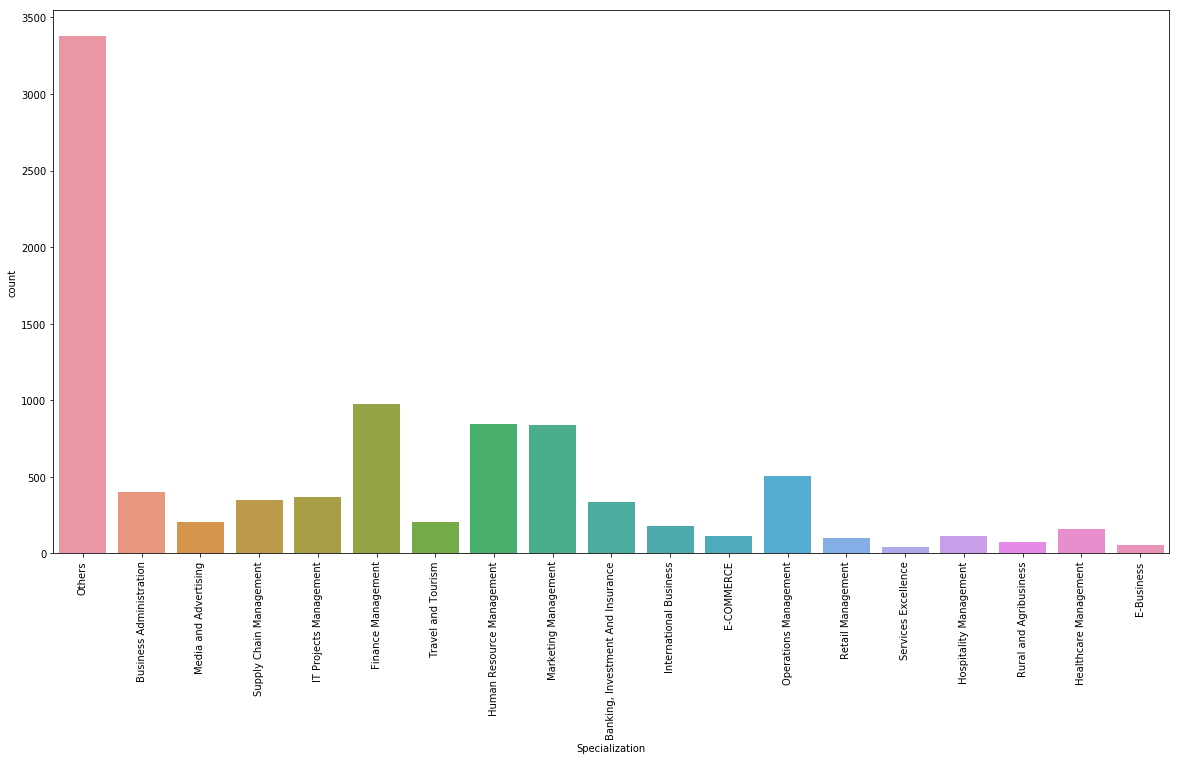

In [43]:
#Here may be the user has missed to fill the value for 'Specialization' or could not find the value in the given options, so let's impute 'Specialization' with 'Others' as we cannot impute it with any of the available values.
lead_data["Specialization"].replace(np.nan, 'Others',inplace=True)
sns.countplot(x="Specialization", data=lead_data)
plt.xticks(rotation = 90)

In [44]:
#'City' has almost 16 percent missing values
lead_data["City"].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

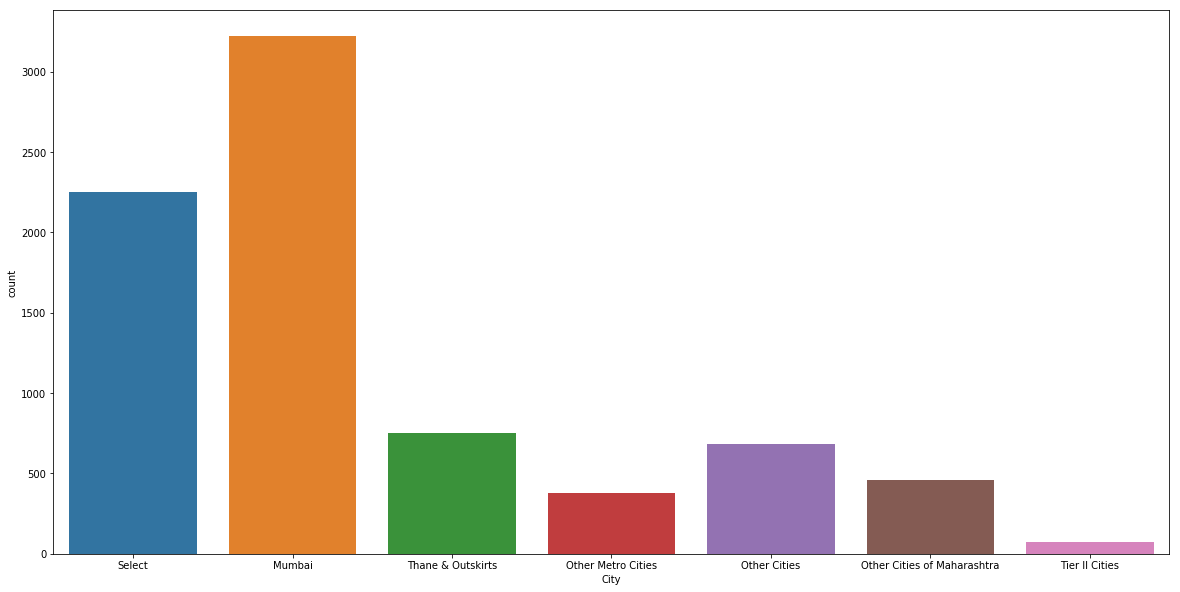

In [45]:
sns.countplot(x="City", data=lead_data)

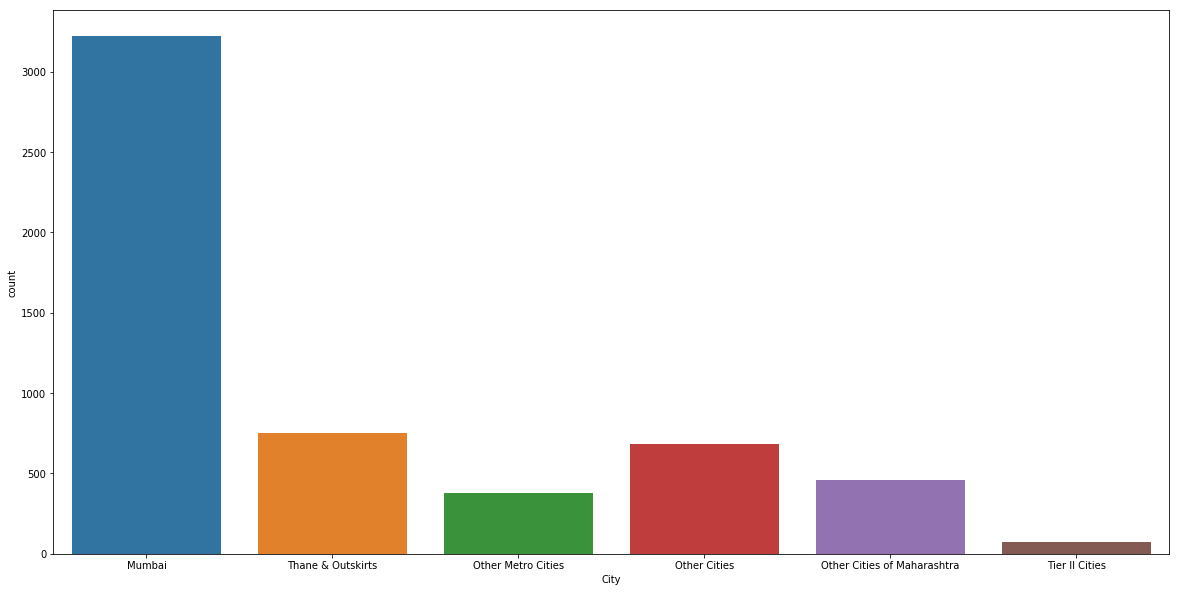

In [46]:
#Here 'Select' is not a value, looks like the user has missed a field. Let's replace 'Select' with null values.
lead_data["City"].replace('Select', np.nan,inplace=True)
sns.countplot(x="City", data=lead_data)

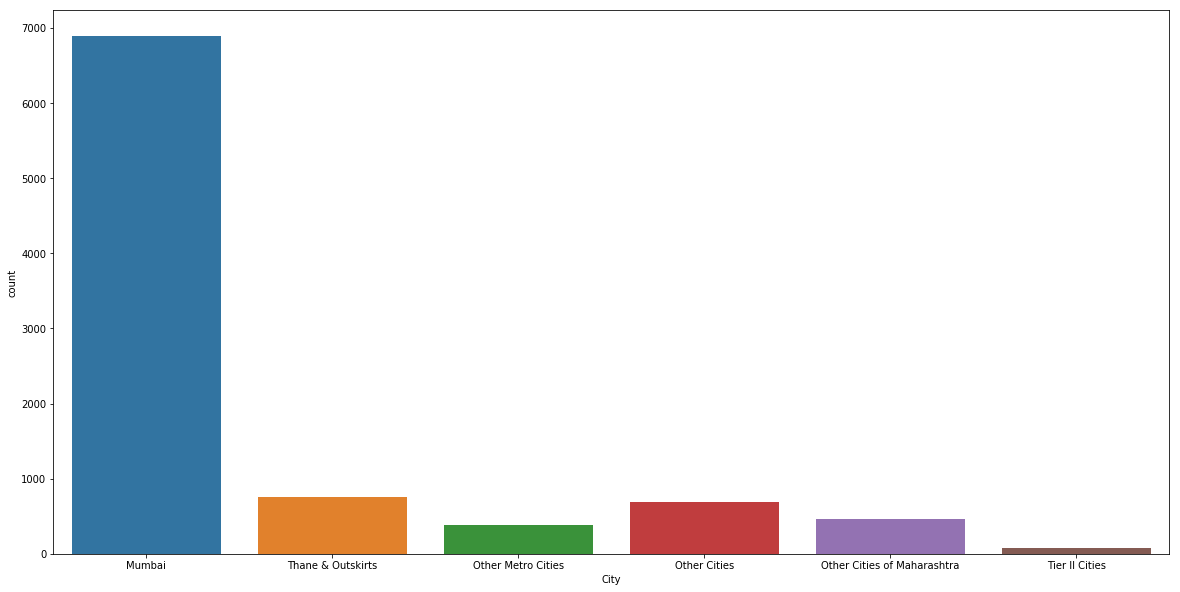

In [47]:
#Since now majority of the values in 'City' column has 'Mumbai', we can impute the null values with the same.
lead_data["City"].replace(np.nan,'Mumbai',inplace=True)
sns.countplot(x="City", data=lead_data)

In [48]:
#calculate percentage of null values in each column
colwise_percent_missingvalues = 100 * lead_data.isnull().sum()/len(lead_data)
round(colwise_percent_missingvalues,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [49]:
#count the number of null values in each column
lead_data.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

In [50]:
# calculate the percentage of missing rows
100*(len(lead_data[lead_data.isnull().sum(axis=1) > 0].index) / len(lead_data.index))

1.7965367965367967

In [51]:
#Since percentage of rows with missing values is less than 2 percent, we drop them all
#retaining the rows having <= 0 NaNs
lead_data = lead_data[lead_data.isnull().sum(axis=1) <= 0]
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

In [52]:
#count the number of null values in each column
lead_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [53]:
#Checking for duplicates
lead_data.loc[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates.

## Step 3: Visualising the Data

#### Univariate analysis

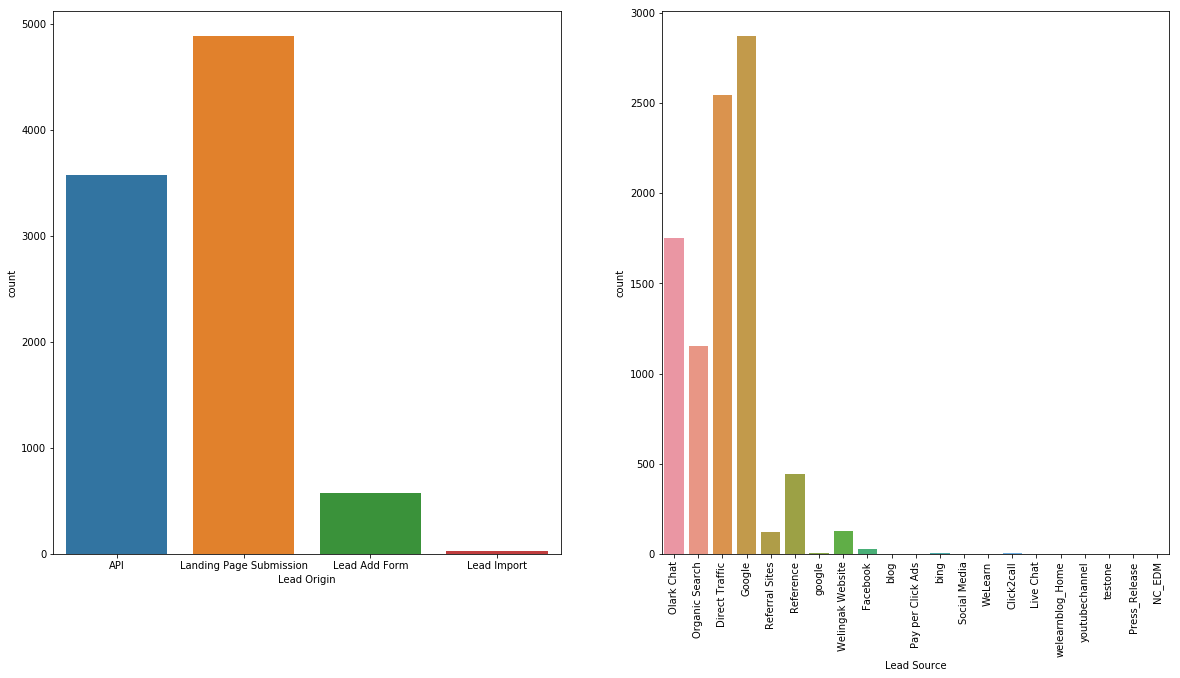

In [54]:
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', data=lead_data)
plt.xticks(rotation = 90)

plt.show()

As observed maximum Lead Origin is from Landing Page Submission while the least is from Lead Import.
As observed mostly Lead Source is from Google.

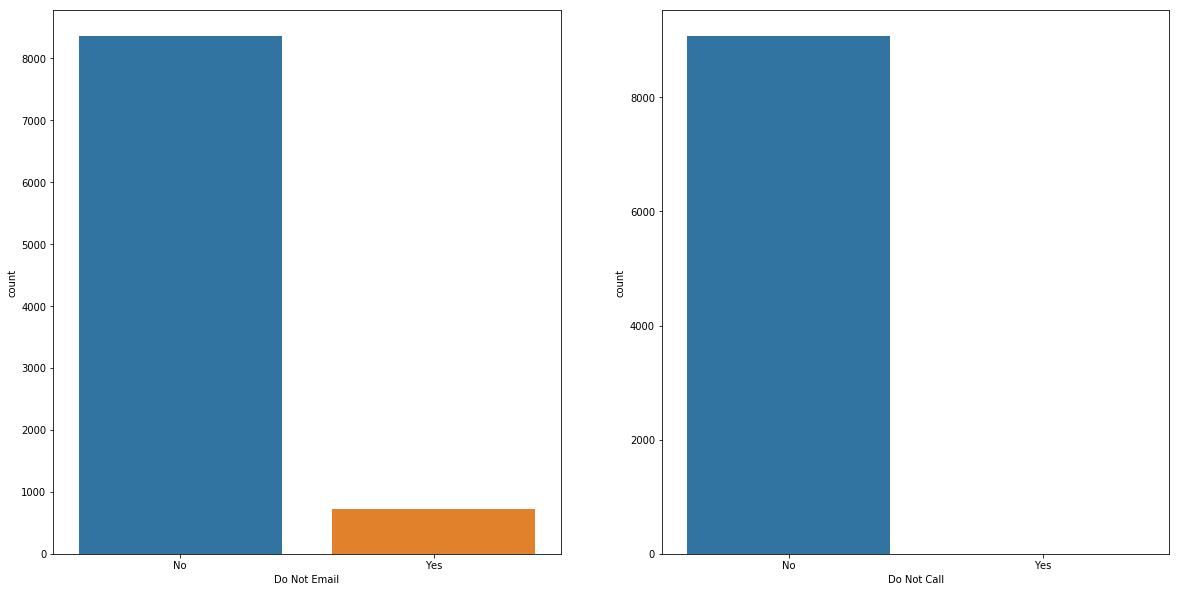

In [55]:
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call', data=lead_data)

plt.show()

As observed people have mostly opted for Do Not Email option while everyone has opted for Do Not Call option.

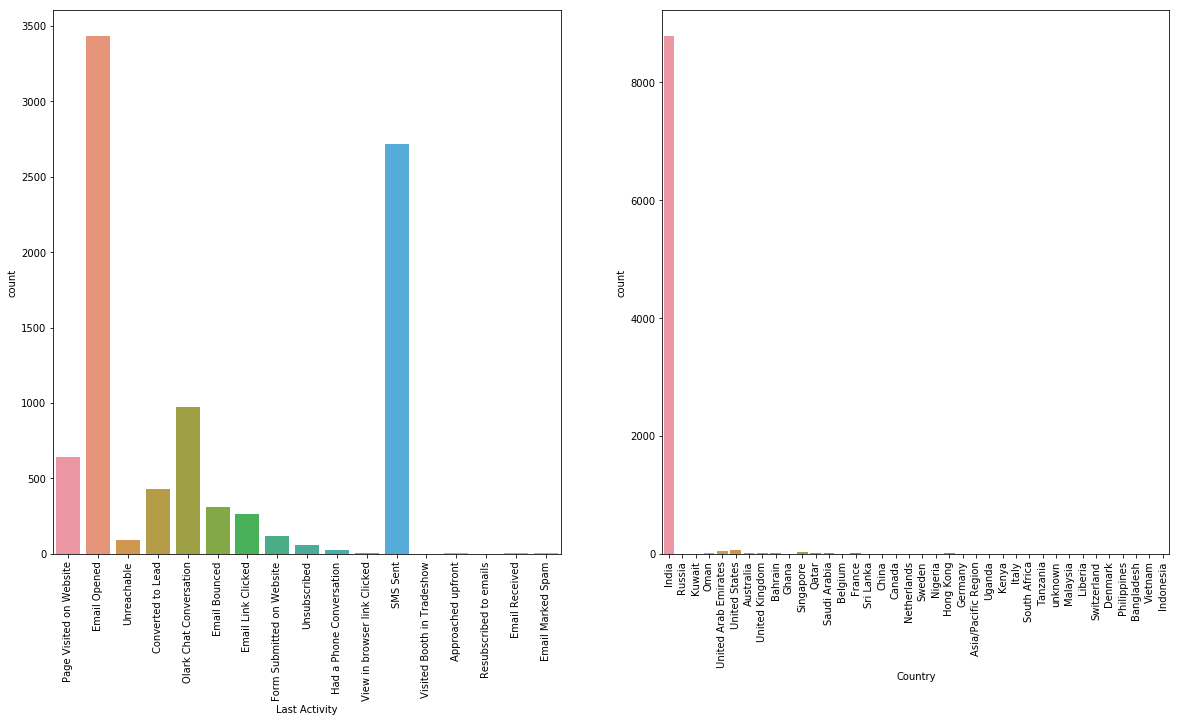

In [56]:
plt.subplot(1, 2, 1)
sns.countplot(x='Last Activity', data=lead_data)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(x='Country', data=lead_data)
plt.xticks(rotation = 90)

plt.show()

As observed the Last Activity for majority of the people is Email opened.
As observed most people belong to India.

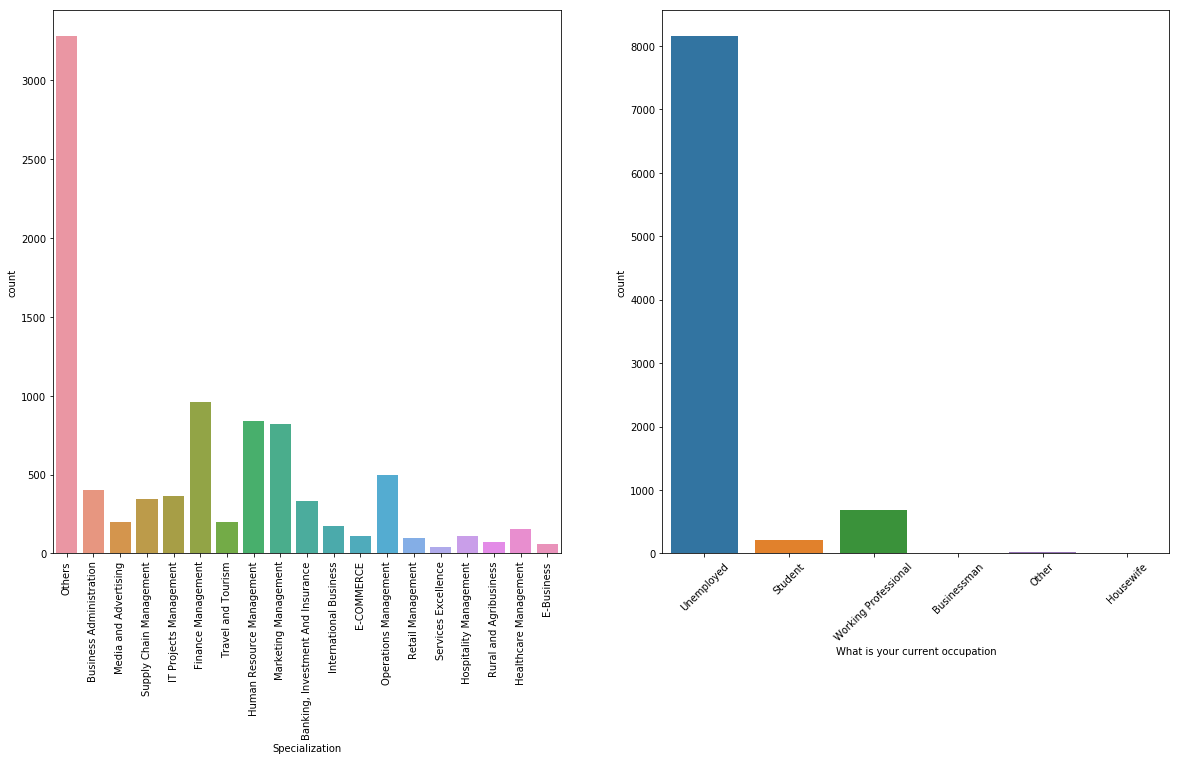

In [57]:
plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', data=lead_data)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', data=lead_data)
plt.xticks(rotation = 45)

plt.show()

As observed most people have not mentioned their Specialization. So may be they haven't opted for any yet.
As observed most people are Unemployed.

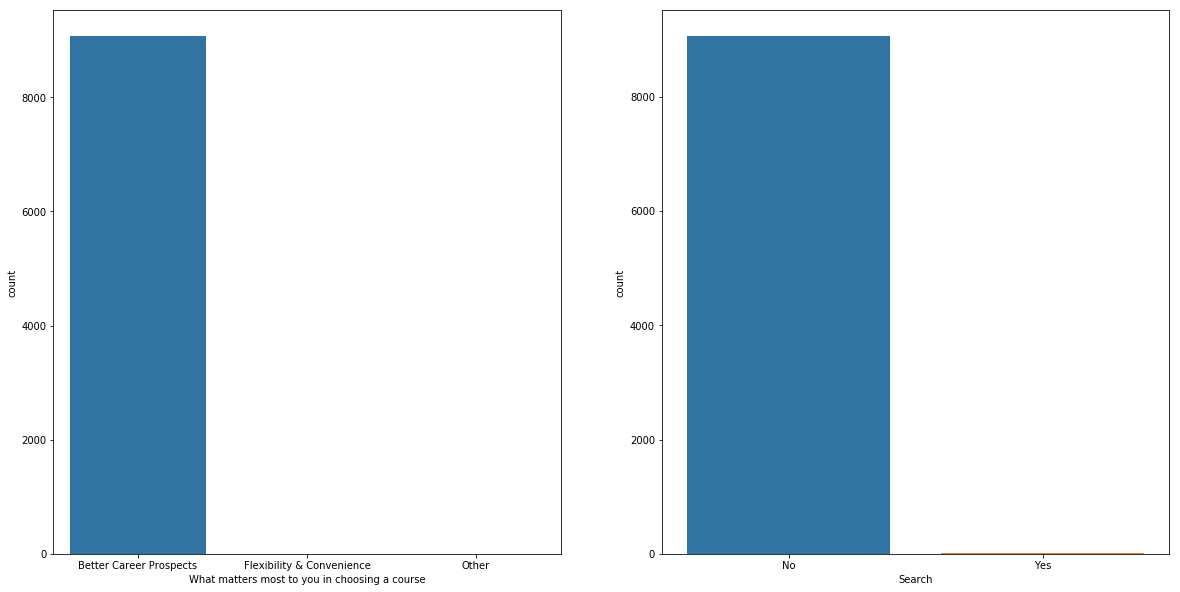

In [58]:
plt.subplot(1, 2, 1)
sns.countplot(x='What matters most to you in choosing a course', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Search', data=lead_data)

plt.show()

As observed most people care about Better Career Prospects while looking for courses.

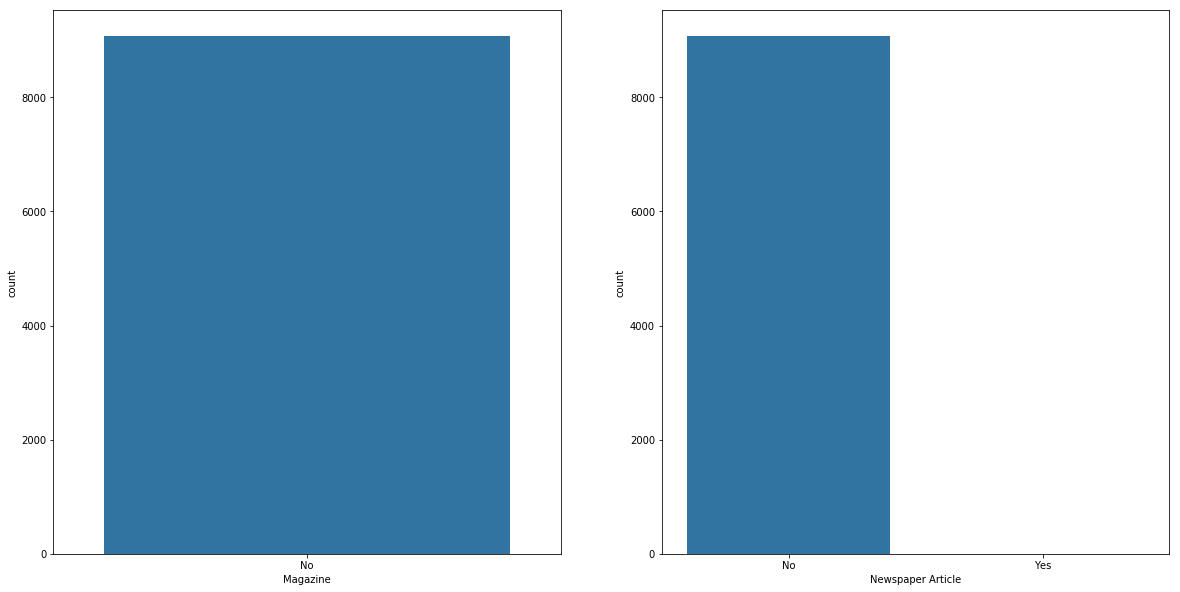

In [59]:
plt.subplot(1, 2, 1)
sns.countplot(x='Magazine', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Newspaper Article', data=lead_data)

plt.show()

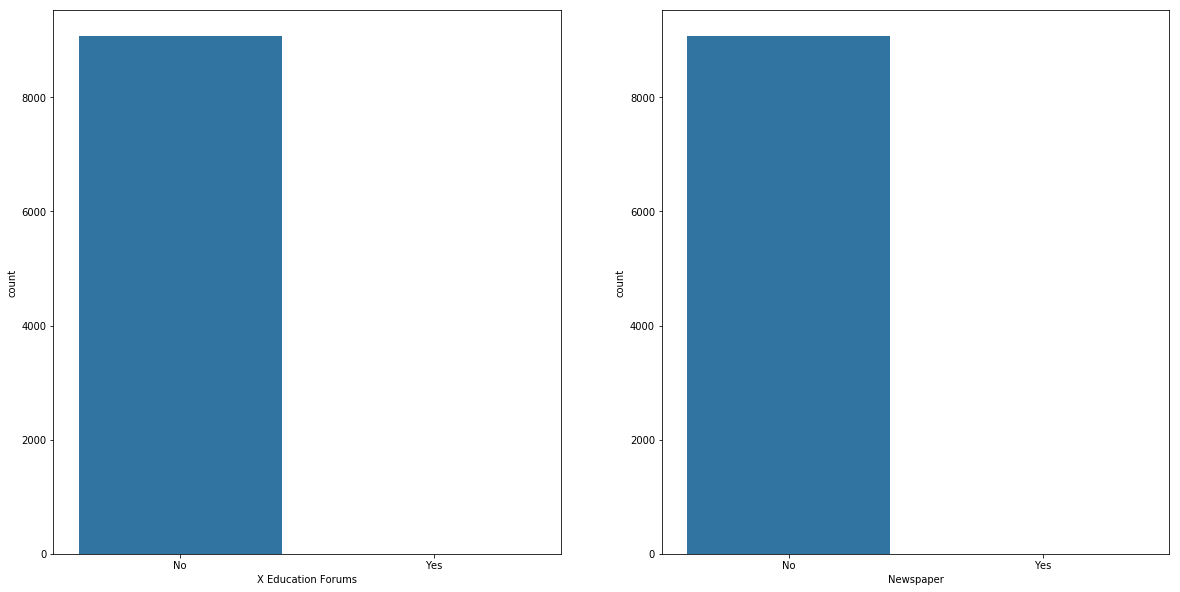

In [60]:
plt.subplot(1, 2, 1)
sns.countplot(x='X Education Forums', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Newspaper', data=lead_data)

plt.show()

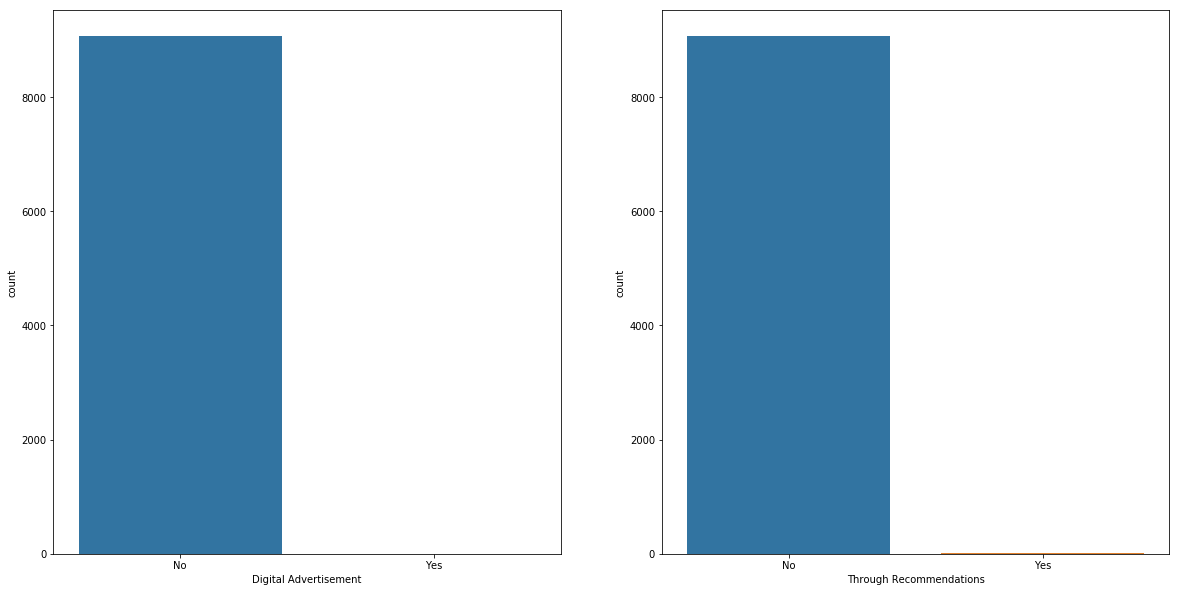

In [61]:
plt.subplot(1, 2, 1)
sns.countplot(x='Digital Advertisement', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Through Recommendations', data=lead_data)

plt.show()

Also, there are very less people who have seen advertisements in Newspaper, Magazines, X Education Forums or Digital Advertisements.
Also, there are no people who came in through recommendations.

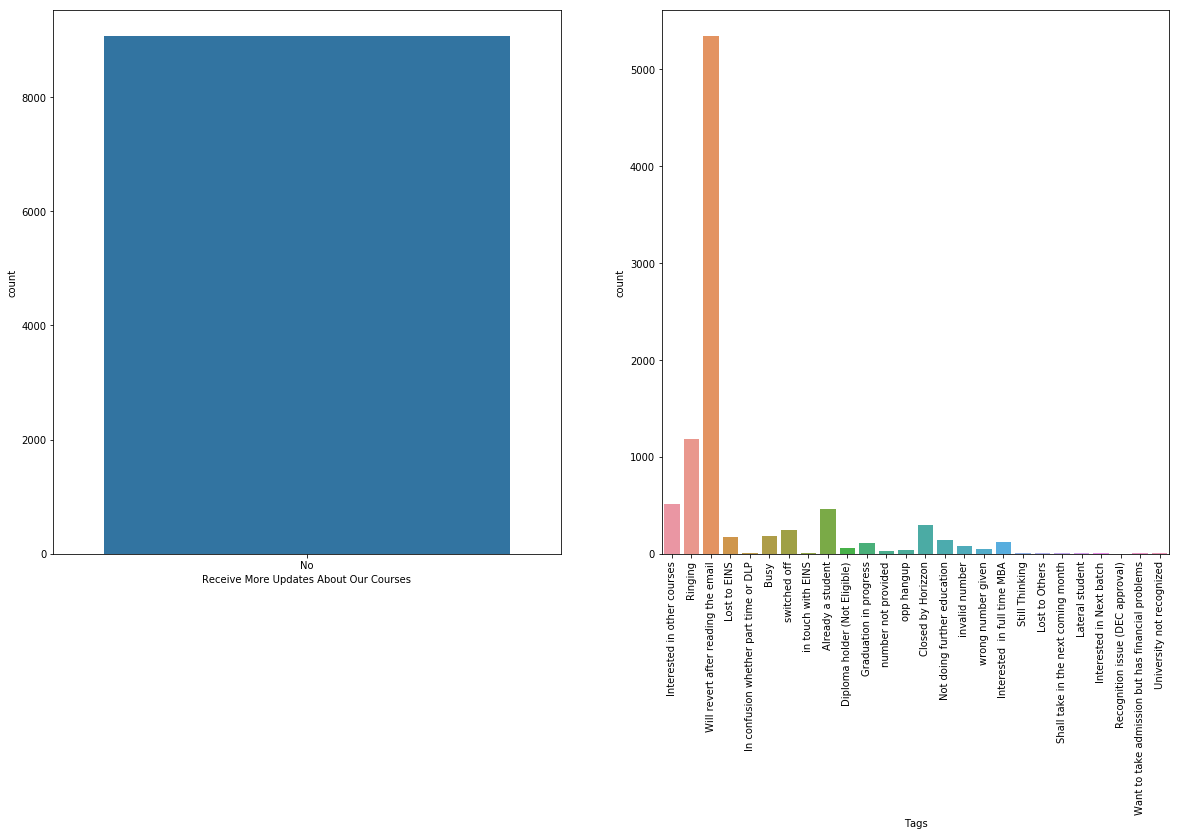

In [62]:
plt.subplot(1, 2, 1)
sns.countplot(x='Receive More Updates About Our Courses', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='Tags', data=lead_data)
plt.xticks(rotation = 90)

plt.show()

People have mostly opted against receiving updates about courses.
Most people have the current status i.e. Tag as Will revert after reading the email.

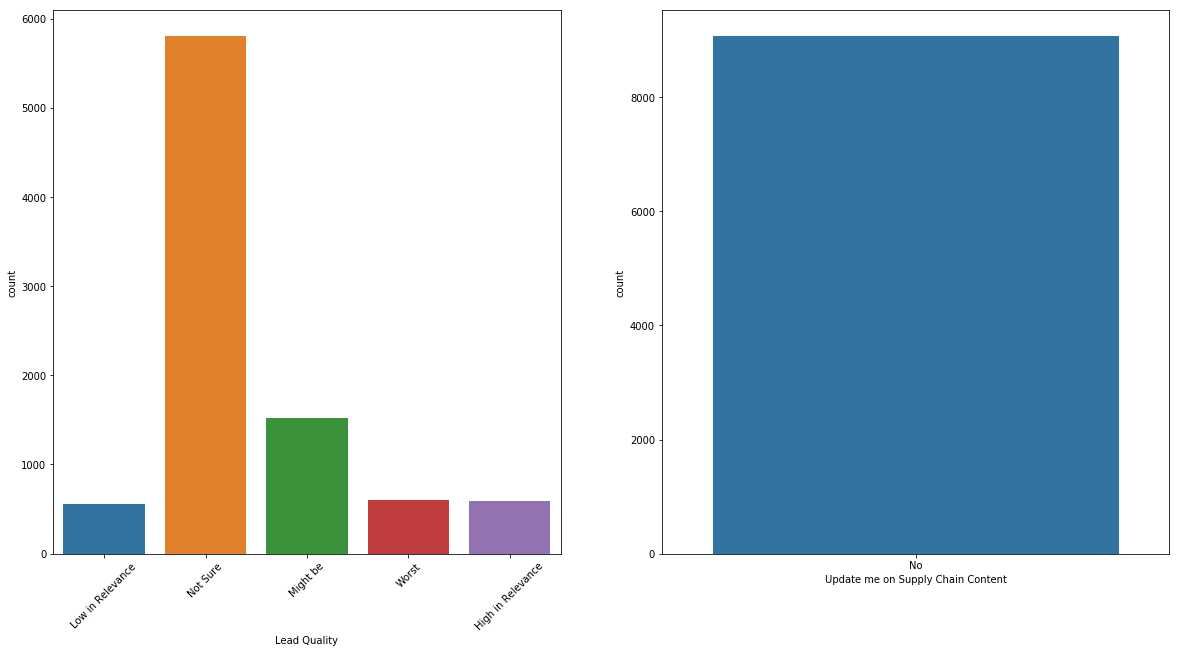

In [63]:
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Quality', data=lead_data)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.countplot(x='Update me on Supply Chain Content', data=lead_data)

plt.show()

As observed maximum Lead Quality is Not Sure and almost all people have opted against updating about Supply chain.

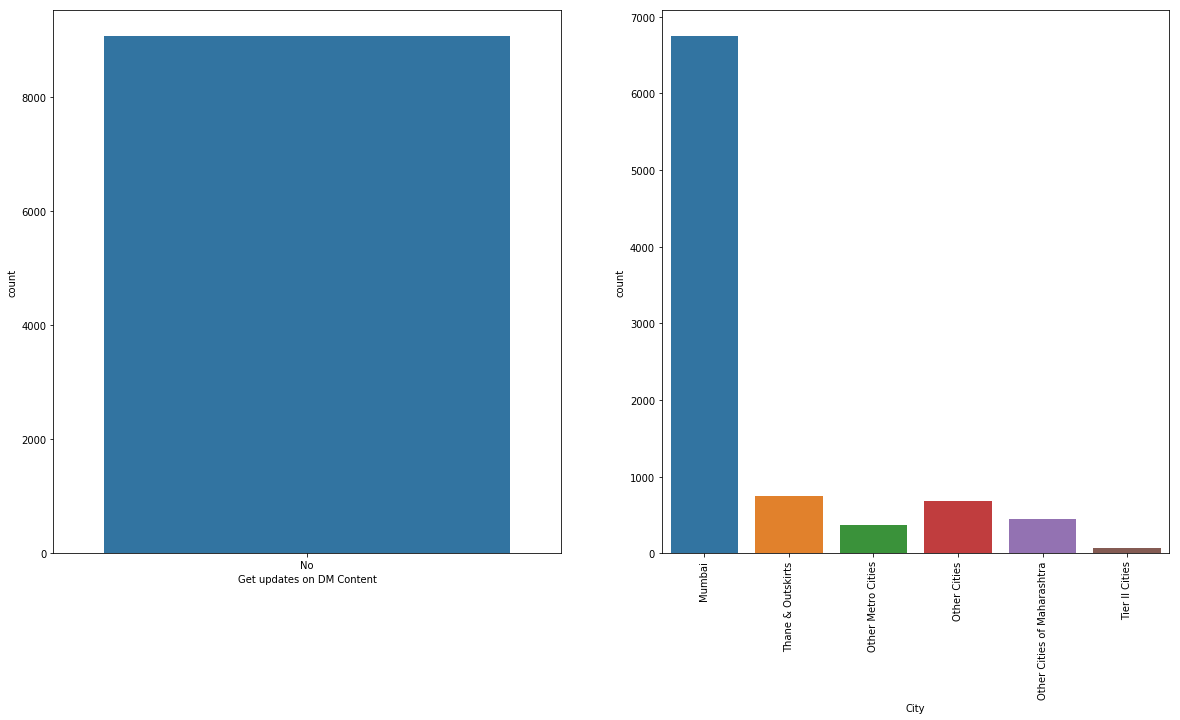

In [64]:
plt.subplot(1, 2, 1)
sns.countplot(x='Get updates on DM Content', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='City', data=lead_data)
plt.xticks(rotation = 90)

plt.show()

As observed most of the people belong to Mumbai and almost all people have opted against getting updates on DM Content.

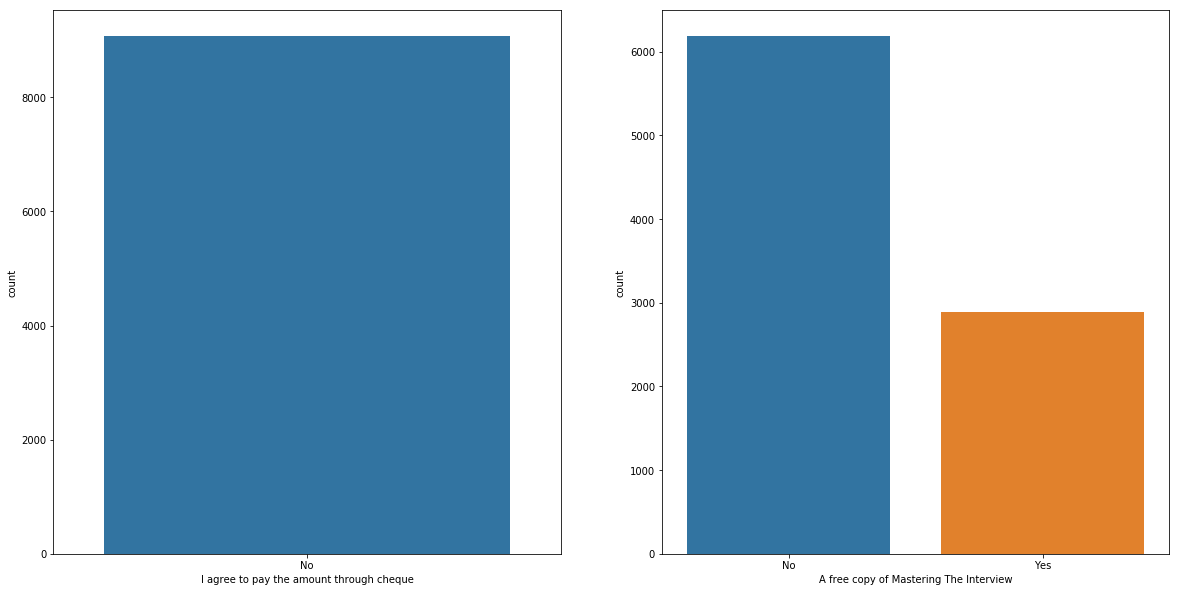

In [65]:
plt.subplot(1, 2, 1)
sns.countplot(x='I agree to pay the amount through cheque', data=lead_data)

plt.subplot(1, 2, 2)
sns.countplot(x='A free copy of Mastering The Interview', data=lead_data)

plt.show()

As observed almost none have opted to make payments through cheque and only few have opted for Free copy of Mastering the Interview.

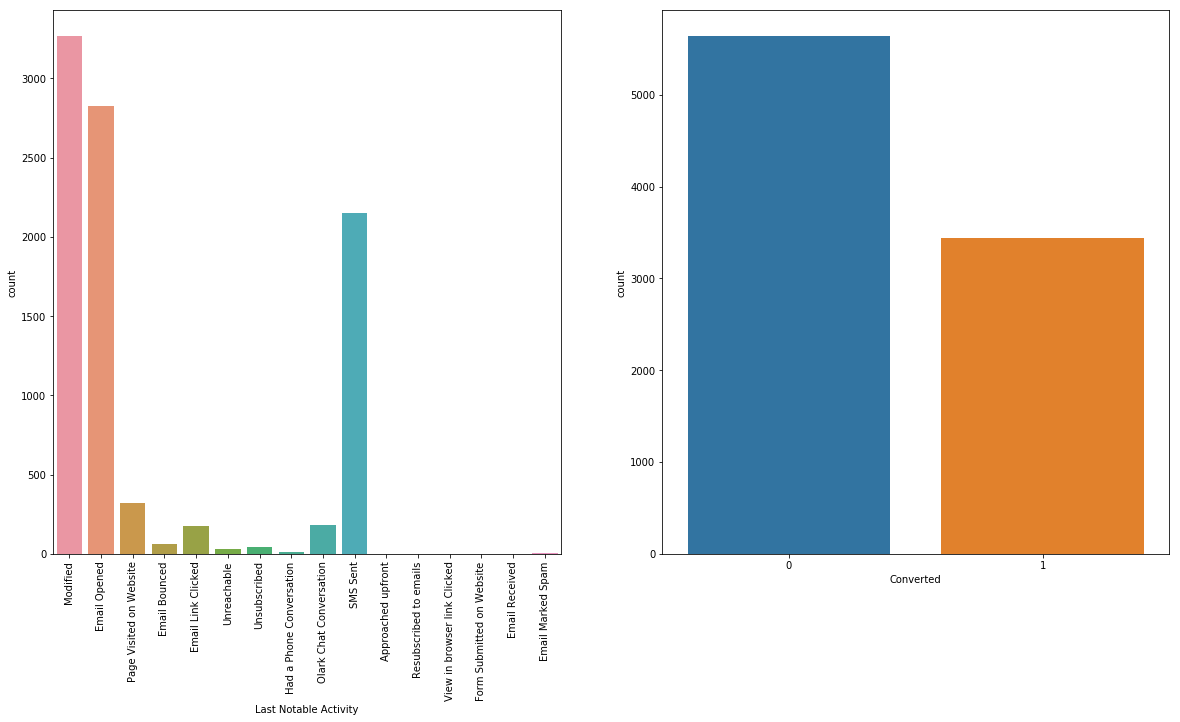

In [66]:
plt.subplot(1, 2, 1)
sns.countplot(x='Last Notable Activity', data=lead_data)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
sns.countplot(x='Converted', data=lead_data)

plt.show()

The Last Notable Activity for most of them is Modified and looks like the rate for Convertion is low.

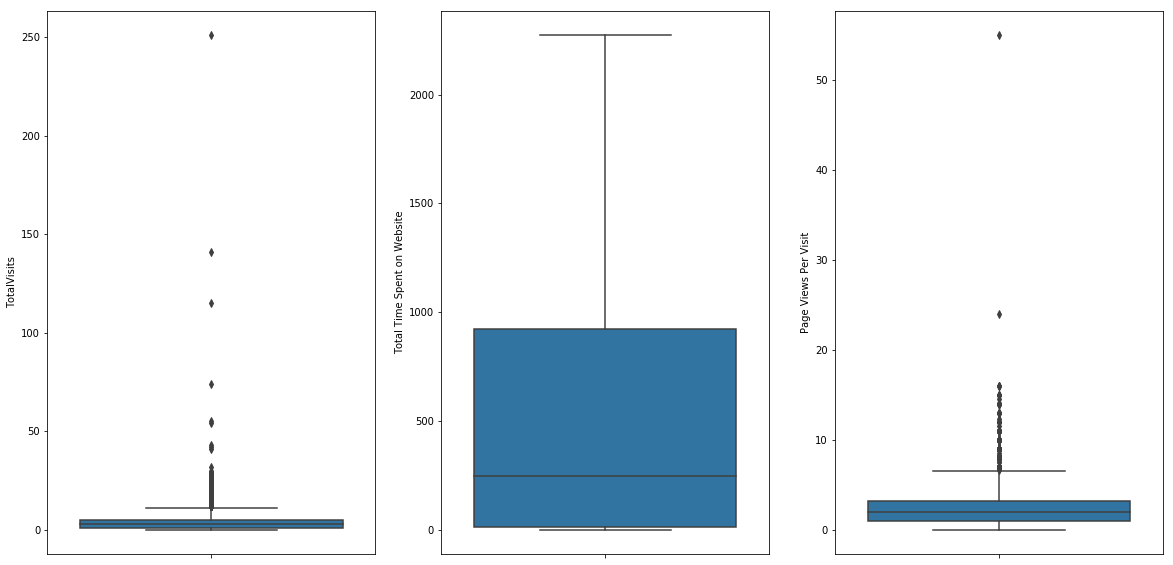

In [67]:
plt.subplot(1, 3, 1)
sns.boxplot(y=lead_data['TotalVisits'])

plt.subplot(1, 3, 2)
sns.boxplot(y=lead_data['Total Time Spent on Website'])

plt.subplot(1, 3, 3)
sns.boxplot(y=lead_data['Page Views Per Visit'])

plt.show()

As observed the number of Total visits mostly ranges from 0 to 25.
The amount of Total time spent on website mostly ranges from 0 to 1000 and the Page views per visit ranges mostly from 0 to 5.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

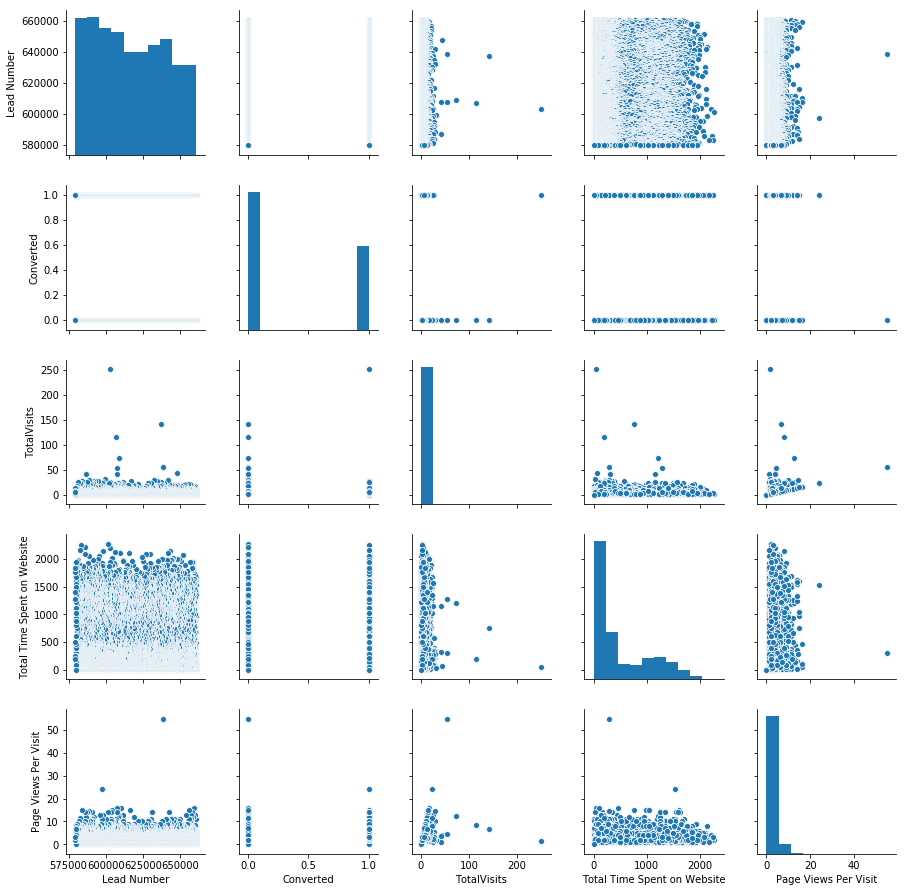

In [68]:
sns.pairplot(lead_data)
plt.show()

In [69]:
correlationval = lead_data.corr()
round(correlationval, 2)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.00,0.02,0.02,0.02,0.06
Converted,0.02,1.00,0.03,0.36,0.00
TotalVisits,0.02,0.03,1.00,0.22,0.51
Total Time Spent on Website,0.02,0.36,0.22,1.00,0.32
Page Views Per Visit,0.06,0.00,0.51,0.32,1.00


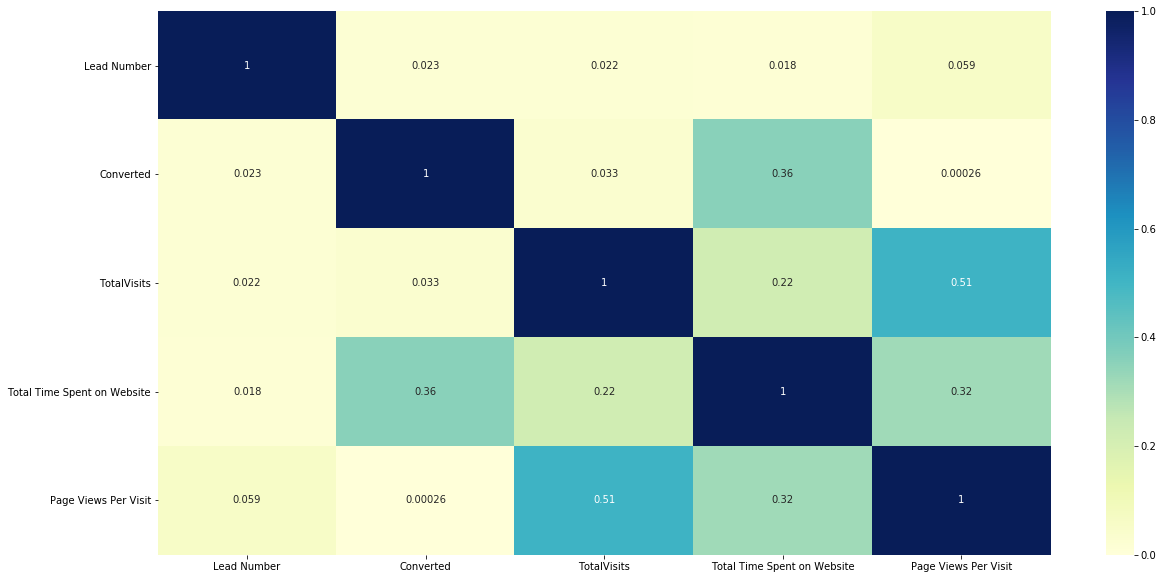

In [70]:
sns.heatmap(correlationval, cmap="YlGnBu", annot=True)
plt.show()

As observed there is not much correlation amongst the variables. Page Views Per Visit and TotalVisits are the most correlated. 

## Step 4: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [71]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [72]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

In [73]:
coluniquecount = lead_data.nunique()
coluniquecount

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [74]:
yesnocols = coluniquecount[coluniquecount <= 2]
yesnocols.index

Index(['Do Not Email', 'Do Not Call', 'Converted', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [75]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [76]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [77]:
# Creating dummy variables for the variable 'Lead Origin'
status = pd.get_dummies(lead_data['Lead Origin'])
status.head()

,API,Landing Page Submission,Lead Add Form,Lead Import
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [78]:
statusmod = status.drop(['Landing Page Submission'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Lead Origin' as we have created the dummies for it
lead_data.drop(['Lead Origin'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,API,Lead Add Form,Lead Import
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,Low in Relevance,0,0,Mumbai,0,0,Modified,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,Not Sure,0,0,Mumbai,0,0,Email Opened,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,Might be,0,0,Mumbai,0,1,Email Opened,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,Not Sure,0,0,Mumbai,0,0,Modified,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,Might be,0,0,Mumbai,0,0,Modified,0,0,0


In [79]:
# Creating dummy variables for the variable 'Lead Source'
status = pd.get_dummies(lead_data['Lead Source'])
status.head()

,Click2call,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,...,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
statusmod = status.drop(['Pay per Click Ads'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Lead Source' as we have created the dummies for it
lead_data.drop(['Lead Source'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Creating dummy variables for the variable 'Last Activity'
status = pd.get_dummies(lead_data['Last Activity'])
status.head()

,Approached upfront,Converted to Lead,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Visited Booth in Tradeshow
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
statusmod = status.drop(['View in browser link Clicked'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Last Activity' as we have created the dummies for it
lead_data.drop(['Last Activity'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,India,Others,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,Others,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,Media and Advertising,...,0,0,0,0,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,Others,...,0,0,0,0,0,0,0,0,0,0


In [83]:
# Creating dummy variables for the variable 'Country'
status = pd.get_dummies(lead_data['Country'])
status.head()

,Asia/Pacific Region,Australia,Bahrain,Bangladesh,Belgium,Canada,China,Denmark,France,Germany,...,Sri Lanka,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
statusmod = status.drop(['Asia/Pacific Region'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Country' as we have created the dummies for it
lead_data.drop(['Country'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,...,Sri Lanka,Sweden,Switzerland,Tanzania,Uganda,United Arab Emirates,United Kingdom,United States,Vietnam,unknown
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# Creating dummy variables for the variable 'Specialization'
status = pd.get_dummies(lead_data['Specialization'])
status.head()

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Others,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [86]:
statusmod = status.drop(['Banking, Investment And Insurance'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Specialization' as we have created the dummies for it
lead_data.drop(['Specialization'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,...,International Business,Marketing Management,Media and Advertising,Operations Management,Others,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,Unemployed,Better Career Prospects,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,Unemployed,Better Career Prospects,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,Student,Better Career Prospects,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,Unemployed,Better Career Prospects,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,Unemployed,Better Career Prospects,...,0,0,0,0,1,0,0,0,0,0


In [87]:
# Creating dummy variables for the variable 'What is your current occupation'
status = pd.get_dummies(lead_data['What is your current occupation'])
status.head()

,Businessman,Housewife,Other,Student,Unemployed,Working Professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [88]:
statusmod = status.drop(['Working Professional'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'What is your current occupation' as we have created the dummies for it
lead_data.drop(['What is your current occupation'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,...,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,Better Career Prospects,0,...,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,Better Career Prospects,0,...,0,0,0,0,0,0,0,0,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,Better Career Prospects,0,...,0,0,0,0,0,0,0,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,Better Career Prospects,0,...,0,0,0,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,Better Career Prospects,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
# Creating dummy variables for the variable 'What matters most to you in choosing a course'
status = pd.get_dummies(lead_data['What matters most to you in choosing a course'])
status.head()

,Better Career Prospects,Flexibility & Convenience,Other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [90]:
statusmod = status.drop(['Flexibility & Convenience'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'What matters most to you in choosing a course' as we have created the dummies for it
lead_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Services Excellence,Supply Chain Management,Travel and Tourism,Businessman,Housewife,Other,Student,Unemployed,Better Career Prospects,Other
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,1,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [91]:
# Creating dummy variables for the variable 'Tags'
status = pd.get_dummies(lead_data['Tags'])
status.head()

,Already a student,Busy,Closed by Horizzon,Diploma holder (Not Eligible),Graduation in progress,In confusion whether part time or DLP,Interested in full time MBA,Interested in Next batch,Interested in other courses,Lateral student,...,Still Thinking,University not recognized,Want to take admission but has financial problems,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [92]:
statusmod = status.drop(['Want to take admission but has financial problems'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Tags' as we have created the dummies for it
lead_data.drop(['Tags'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Shall take in the next coming month,Still Thinking,University not recognized,Will revert after reading the email,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [93]:
# Creating dummy variables for the variable 'Lead Quality'
status = pd.get_dummies(lead_data['Lead Quality'])
status.head()

,High in Relevance,Low in Relevance,Might be,Not Sure,Worst
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [94]:
statusmod = status.drop(['Low in Relevance'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Lead Quality' as we have created the dummies for it
lead_data.drop(['Lead Quality'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,in touch with EINS,invalid number,number not provided,opp hangup,switched off,wrong number given,High in Relevance,Might be,Not Sure,Worst
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
# Creating dummy variables for the variable 'City'
status = pd.get_dummies(lead_data['City'])
status.head()

,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [96]:
statusmod = status.drop(['Other Cities of Maharashtra'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'City' as we have created the dummies for it
lead_data.drop(['City'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,wrong number given,High in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Metro Cities,Thane & Outskirts,Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,1,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [97]:
# Creating dummy variables for the variable 'Last Notable Activity'
status = pd.get_dummies(lead_data['Last Notable Activity'])
status.head()

,Approached upfront,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [98]:
statusmod = status.drop(['View in browser link Clicked'], 1)
lead_data = pd.concat([lead_data, statusmod], axis=1)
# Drop 'Last Notable Activity' as we have created the dummies for it
lead_data.drop(['Last Notable Activity'], axis = 1, inplace = True)
lead_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
lead_data.columns.values

array(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'API', 'Lead Add Form',
       'Lead Import', 'Click2call', 'Direct Traffic', 'Facebook',
       'Google', 'Live Chat', 'NC_EDM', 'Olark Chat', 'Organic Search',
       'Press_Release', 'Reference', 'Referral Sites', 'Social Media',
       'WeLearn', 'Welingak Website', 'bing', 'blog', 'google', 'testone',
       'welearnblog_Home', 'youtubechannel', 'Approached upfront',
       'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam',

#### Dropping the repeated variables

In [100]:
lead_data = lead_data.loc[:, ~lead_data.columns.duplicated()]

In [101]:
lead_data.columns.values

array(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'API', 'Lead Add Form',
       'Lead Import', 'Click2call', 'Direct Traffic', 'Facebook',
       'Google', 'Live Chat', 'NC_EDM', 'Olark Chat', 'Organic Search',
       'Press_Release', 'Reference', 'Referral Sites', 'Social Media',
       'WeLearn', 'Welingak Website', 'bing', 'blog', 'google', 'testone',
       'welearnblog_Home', 'youtubechannel', 'Approached upfront',
       'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam',

Since we do not need 'Lead Number' let's drop that as well.

In [102]:
lead_data.drop('Lead Number', axis=1, inplace = True)

### Step 5: Test-Train Split

In [103]:
# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,High in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Metro Cities,Thane & Outskirts,Tier II Cities,Modified
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [104]:
# Putting response variable to y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [106]:
scaler = StandardScaler()

scale_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])

X_train.head()

D:\NC\Training_Py\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\NC\Training_Py\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,High in Relevance,Might be,Not Sure,Worst,Mumbai,Other Cities,Other Metro Cities,Thane & Outskirts,Tier II Cities,Modified
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [107]:
### Checking the Converted Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

37.85541106458012

We have almost 38% converted rate

### Step 6: Looking at Correlations

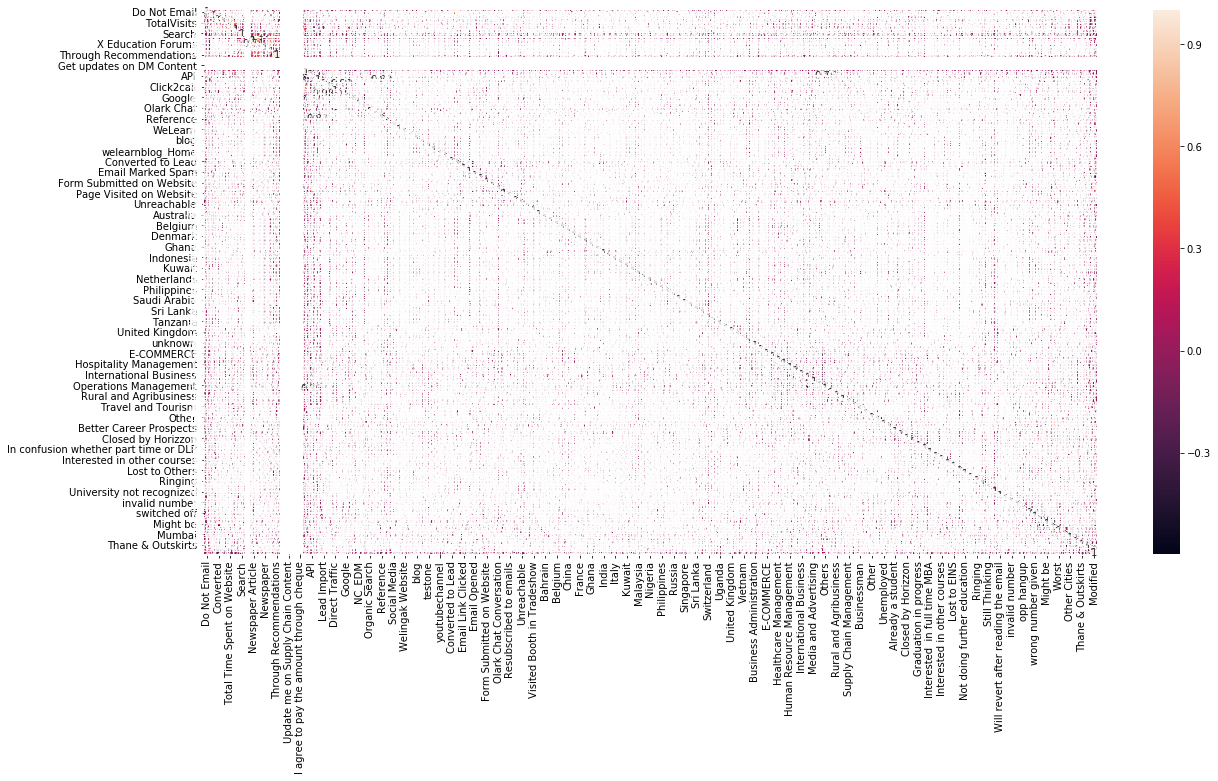

In [108]:
# Let's see the correlation matrix 
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

### Step 8: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [109]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                          143
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Jan 2020   Deviance:                          nan
Time:                        18:16:53   Pearson chi2:                 3.18e+18
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                    -1.009e+15   1.16e+08  -8.71e+06      0.000   -1.01e+15   -1.01e+15
Do Not Email                             -3.876e+14   4.48e+06  -8.66e+07      0.000   -3.88e+14   -3.88e+14
Do Not Call                               7.797e+14   4.78e+07   1.63e+07      0.000     7.8e+14     7.8e+14
TotalVisits                               4.843e+13   9.92e+05   4.88e+07      0.000    4.84e+13    4.84e+13
Total Time Spent on Website                1.95e+14   1.03e+06    1.9e+08      0.000    1.95e+14    1.95e+14
Page Views Per Visit                      -3.41e+13   1.26e+06   -2.7e+07      0.000   -3.41e+13   -3.41e+13
Search                                   -6.073e+14   2.39e+07  -2.54e+07      0.000   -6.07e+14   -6.07e+14
Magazine                                  -117.2865   4.69e-06   -2.5e+07      0.000    -117.287    -117.287
Newspaper Article                          3.84e+15   6.74e+07    5.7e+07      0.000    3.84e+15    3.84e+15
X Education Forums                       -8.295e+15   1.13e+08  -7.35e+07      0.000    -8.3e+15    -8.3e+15
Newspaper                                -4.388e+15   6.73e+07  -6.52e+07      0.000   -4.39e+15   -4.39e+15
Digital Advertisement                    -7.161e+14   4.81e+07  -1.49e+07      0.000   -7.16e+14   -7.16e+14
Through Recommendations                   1.215e+14   3.57e+07    3.4e+06      0.000    1.22e+14    1.22e+14
Receive More Updates About Our Courses     108.6854   2.41e-06   4.52e+07      0.000     108.685     108.685
Update me on Supply Chain Content         -156.5662   4.16e-06  -3.76e+07      0.000    -156.566    -156.566
Get updates on DM Content                  109.4405   2.39e-06   4.57e+07      0.000     109.440     109.441
I agree to pay the amount through cheque    -3.2318   4.33e-06  -7.47e+05      0.000      -3.232      -3.232
A free copy of Mastering The Interview   -1.253e+14   2.72e+06   -4.6e+07      0.000   -1.25e+14   -1.25e+14
API                                       1.706e+14   3.41e+06      5e+07      0.000    1.71e+14    1.71e+14
Lead Add Form                            -1.281e+15   4.77e+07  -2.68e+07      0.000   -1.28e+15   -1.28e+15
Lead Import                               4.913e+15   7.24e+07   6.79e+07      0.000    4.91e+15    4.91e+15
Click2call                                2.915e+15    9.2e+07   3.17e+07      0.000    2.91e+15    2.91e+15
Direct Traffic                            1.623e+15   6.74e+07   2.41e+07      0.000    1.62e+15    1.62e+15
Facebook                                 -3.269e+15    9.8e+07  -3.34e+07      0.000   -3.27e+15   -3.27e+15
Google                                    1.566e+15   6.73e+07   2.33e+07      0.000    1.57e+15    1.57e+15
Live Chat                                 7.182e+15   9.52e+07   7.54e+07      0.000    7.18e+15    7.18e+15
N

### Step 9: Feature Selection Using RFE

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [111]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False,  True,

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('Do Not Call', False, 41),
 ('TotalVisits', False, 83),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 82),
 ('Search', False, 51),
 ('Magazine', False, 133),
 ('Newspaper Article', False, 54),
 ('X Education Forums', False, 88),
 ('Newspaper', False, 116),
 ('Digital Advertisement', False, 109),
 ('Through Recommendations', False, 121),
 ('Receive More Updates About Our Courses', False, 131),
 ('Update me on Supply Chain Content', False, 130),
 ('Get updates on DM Content', False, 132),
 ('I agree to pay the amount through cheque', False, 135),
 ('A free copy of Mastering The Interview', False, 65),
 ('API', False, 23),
 ('Lead Add Form', False, 5),
 ('Lead Import', False, 32),
 ('Click2call', False, 46),
 ('Direct Traffic', False, 12),
 ('Facebook', False, 102),
 ('Google', False, 15),
 ('Live Chat', False, 72),
 ('NC_EDM', False, 43),
 ('Olark Chat', False, 44),
 ('Organic Search', False, 14),
 ('Press_Release', False, 112

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['Welingak Website', 'SMS Sent', 'Already a student', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Ringing',
       'Will revert after reading the email', 'invalid number',
       'number not provided', 'switched off', 'wrong number given', 'Not Sure',
       'Worst', 'Modified'],
      dtype='object')

In [115]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'University not recognized', 'in touch with EINS', 'opp hangup',
       'High in Relevance', 'Might be', 'Mumbai', 'Other Cities',
       'Other Metro Cities', 'Thane & Outskirts', 'Tier II Cities'],
      dtype='object', length=137)

##### Assessing the model with StatsModels

In [116]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1572.9
Date:                Tue, 14 Jan 2020   Deviance:                       3145.7
Time:                        18:17:00   Pearson chi2:                 2.91e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.7945      0.225     -3.534      0.000      -1.235      -0.354
Welingak Website                        4.0964      0.736      5.567      0.000       2.654       5.539
SMS Sent                                2.0150      0.102     19.839      0.000       1.816       2.214
Already a student                      -1.1493      0.782     -1.470      0.142      -2.681       0.383
Busy                                    3.2432      0.331      9.801      0.000       2.595       3.892
Closed by Horizzon                      8.3837      0.774     10.826      0.000       6.866       9.901
Lost to EINS                            9.1758      0.766     11.982      0.000       7.675      10.677
Ringing                                -2.3171      0.339     -6.839      0.000      -2.981      -1.653
Will revert after reading the email     3.3930      0.239     14.186      0.000       2.924       3.862
invalid number                        -23.8250   2.24e+04     -0.001      0.999   -4.39e+04    4.39e+04
number not provided                   -24.5723   3.81e+04     -0.001      0.999   -7.46e+04    7.46e+04
switched off                           -2.9909      0.586     -5.104      0.000      -4.139      -1.842
wrong number given                    -23.3769    3.2e+04     -0.001      0.999   -6.28e+04    6.28e+04
Not Sure                               -3.6151      0.129    -27.959      0.000      -3.869      -3.362
Worst                                  -3.8284      0.857     -4.466      0.000      -5.508      -2.148
Modified                               -1.7425      0.106    -16.380      0.000      -1.951      -1.534
=======================================================================================================
"""

In [117]:
#`number not provided` has high p value; can be dropped
col1 = col.drop('number not provided',1)
col1

Index(['Welingak Website', 'SMS Sent', 'Already a student', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Ringing',
       'Will revert after reading the email', 'invalid number', 'switched off',
       'wrong number given', 'Not Sure', 'Worst', 'Modified'],
      dtype='object')

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1578.5
Date:                Tue, 14 Jan 2020   Deviance:                       3157.0
Time:                        18:17:00   Pearson chi2:                 2.86e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.9618      0.225     -4.281      0.000      -1.402      -0.521
Welingak Website                        4.0934      0.735      5.566      0.000       2.652       5.535
SMS Sent                                1.9984      0.101     19.768      0.000       1.800       2.197
Already a student                      -0.9964      0.783     -1.273      0.203      -2.530       0.538
Busy                                    3.4089      0.331     10.300      0.000       2.760       4.058
Closed by Horizzon                      8.5269      0.775     11.003      0.000       7.008      10.046
Lost to EINS                            9.3136      0.766     12.154      0.000       7.812      10.816
Ringing                                -2.1381      0.338     -6.331      0.000      -2.800      -1.476
Will revert after reading the email     3.5513      0.240     14.780      0.000       3.080       4.022
invalid number                        -23.6478   2.24e+04     -0.001      0.999    -4.4e+04    4.39e+04
switched off                           -2.8087      0.585     -4.800      0.000      -3.956      -1.662
wrong number given                    -23.2030   3.21e+04     -0.001      0.999   -6.29e+04    6.29e+04
Not Sure                               -3.6037      0.129    -27.929      0.000      -3.857      -3.351
Worst                                  -3.7778      0.864     -4.374      0.000      -5.471      -2.085
Modified                               -1.7258      0.106    -16.273      0.000      -1.934      -1.518
=======================================================================================================
"""

In [119]:
#'invalid number' has high p value; can be dropped
col2 = col1.drop('invalid number',1)
col2

Index(['Welingak Website', 'SMS Sent', 'Already a student', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Ringing',
       'Will revert after reading the email', 'switched off',
       'wrong number given', 'Not Sure', 'Worst', 'Modified'],
      dtype='object')

In [120]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.4
Date:                Tue, 14 Jan 2020   Deviance:                       3170.8
Time:                        18:17:01   Pearson chi2:                 2.84e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.1674      0.225     -5.194      0.000      -1.608      -0.727
Welingak Website                        4.0909      0.735      5.566      0.000       2.650       5.531
SMS Sent                                1.9704      0.100     19.623      0.000       1.774       2.167
Already a student                      -0.7744      0.781     -0.992      0.321      -2.305       0.756
Busy                                    3.6275      0.329     11.015      0.000       2.982       4.273
Closed by Horizzon                      8.7184      0.775     11.247      0.000       7.199      10.238
Lost to EINS                            9.5145      0.767     12.402      0.000       8.011      11.018
Ringing                                -1.9100      0.336     -5.693      0.000      -2.568      -1.252
Will revert after reading the email     3.7579      0.240     15.653      0.000       3.287       4.228
switched off                           -2.5770      0.584     -4.415      0.000      -3.721      -1.433
wrong number given                    -20.9753   1.18e+04     -0.002      0.999   -2.32e+04    2.31e+04
Not Sure                               -3.5991      0.129    -27.958      0.000      -3.851      -3.347
Worst                                  -3.8588      0.853     -4.522      0.000      -5.531      -2.186
Modified                               -1.7122      0.106    -16.183      0.000      -1.920      -1.505
=======================================================================================================
"""

In [121]:
#'wrong number given' has high p value; can be dropped
col3 = col2.drop('wrong number given',1)
col3

Index(['Welingak Website', 'SMS Sent', 'Already a student', 'Busy',
       'Closed by Horizzon', 'Lost to EINS', 'Ringing',
       'Will revert after reading the email', 'switched off', 'Not Sure',
       'Worst', 'Modified'],
      dtype='object')

In [122]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.6
Date:                Tue, 14 Jan 2020   Deviance:                       3175.2
Time:                        18:17:01   Pearson chi2:                 2.85e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.2429      0.223     -5.561      0.000      -1.681      -0.805
Welingak Website                        4.0909      0.735      5.567      0.000       2.651       5.531
SMS Sent                                1.9656      0.100     19.601      0.000       1.769       2.162
Already a student                      -0.6952      0.780     -0.891      0.373      -2.225       0.834
Busy                                    3.7078      0.328     11.309      0.000       3.065       4.350
Closed by Horizzon                      8.7930      0.775     11.348      0.000       7.274      10.312
Lost to EINS                            9.5915      0.767     12.505      0.000       8.088      11.095
Ringing                                -1.8303      0.334     -5.478      0.000      -2.485      -1.175
Will revert after reading the email     3.8357      0.239     16.078      0.000       3.368       4.303
switched off                           -2.4968      0.583     -4.284      0.000      -3.639      -1.354
Not Sure                               -3.6011      0.129    -27.987      0.000      -3.853      -3.349
Worst                                  -3.8777      0.851     -4.557      0.000      -5.546      -2.210
Modified                               -1.7087      0.106    -16.158      0.000      -1.916      -1.501
=======================================================================================================
"""

In [123]:
#'Already a student' has high p value; can be dropped
col4 = col3.drop('Already a student',1)
col4

Index(['Welingak Website', 'SMS Sent', 'Busy', 'Closed by Horizzon',
       'Lost to EINS', 'Ringing', 'Will revert after reading the email',
       'switched off', 'Not Sure', 'Worst', 'Modified'],
      dtype='object')

In [124]:
X_train_sm = sm.add_constant(X_train[col4])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.1
Date:                Tue, 14 Jan 2020   Deviance:                       3176.1
Time:                        18:17:01   Pearson chi2:                 2.88e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.3042      0.215     -6.053      0.000      -1.726      -0.882
Welingak Website                        4.0914      0.735      5.567      0.000       2.651       5.532
SMS Sent                                1.9696      0.100     19.650      0.000       1.773       2.166
Busy                                    3.7682      0.323     11.675      0.000       3.136       4.401
Closed by Horizzon                      8.8579      0.772     11.470      0.000       7.344      10.372
Lost to EINS                            9.6762      0.764     12.661      0.000       8.178      11.174
Ringing                                -1.7722      0.329     -5.380      0.000      -2.418      -1.127
Will revert after reading the email     3.8975      0.231     16.863      0.000       3.444       4.351
switched off                           -2.4392      0.580     -4.204      0.000      -3.576      -1.302
Not Sure                               -3.6031      0.129    -28.005      0.000      -3.855      -3.351
Worst                                  -4.0375      0.821     -4.920      0.000      -5.646      -2.429
Modified                               -1.7091      0.106    -16.158      0.000      -1.916      -1.502
=======================================================================================================
"""

In [125]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.267033
1012    0.267033
9226    0.001628
4750    0.723105
7987    0.993500
1281    0.989677
2880    0.267033
4971    0.696492
7536    0.930431
1248    0.001628
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26703289, 0.26703289, 0.00162783, 0.72310516, 0.99350001,
       0.98967668, 0.26703289, 0.69649233, 0.93043087, 0.00162783])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.267033,3009
1,0,0.267033,1012
2,0,0.001628,9226
3,1,0.723105,4750
4,1,0.993500,7987


##### Creating new column 'Lead Score' as Converted_Prob * 100.

In [128]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob * 100

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead Score
0,0,0.267033,3009,26.703289
1,0,0.267033,1012,26.703289
2,0,0.001628,9226,0.162783
3,1,0.723105,4750,72.310516
4,1,0.993500,7987,99.350001


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [129]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead Score,predicted
0,0,0.267033,3009,26.703289,0
1,0,0.267033,1012,26.703289,0
2,0,0.001628,9226,0.162783,0
3,1,0.723105,4750,72.310516,1
4,1,0.993500,7987,99.350001,1


In [130]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 353 2093]]


In [131]:
# Predicted       not_converted    converted
# Actual
# not_converted        3751        154
# converted            353        2093  

In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9201700519603212


#### Checking VIFs

In [133]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Busy,1.11
7,switched off,1.09
3,Closed by Horizzon,1.05
4,Lost to EINS,1.05
0,Welingak Website,1.04
9,Worst,0.40
10,Modified,0.17
8,Not Sure,0.14
1,SMS Sent,0.13
6,Will revert after reading the email,0.12


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## Metrics beyond simply accuracy

In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8556827473426002

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.9605633802816902

In [138]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.03943661971830986


In [139]:
# positive predictive value 
print (TP / float(TP+FP))

0.9314641744548287


In [140]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9139863547758285


### Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

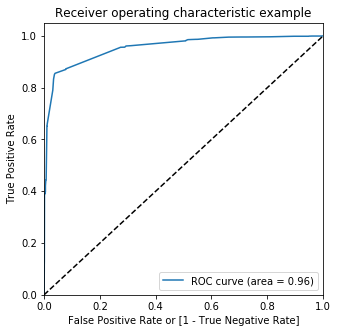

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.267033,3009,26.703289,0,1,1,1,0,0,0,0,0,0,0
1,0,0.267033,1012,26.703289,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001628,9226,0.162783,0,1,0,0,0,0,0,0,0,0,0
3,1,0.723105,4750,72.310516,1,1,1,1,1,1,1,1,1,0,0
4,1,0.993500,7987,99.350001,1,1,1,1,1,1,1,1,1,1,1


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.793891  0.962388  0.688348
0.2   0.2  0.797512  0.961979  0.694494
0.3   0.3  0.902378  0.870401  0.922407
0.4   0.4  0.920170  0.855683  0.960563
0.5   0.5  0.920170  0.855683  0.960563
0.6   0.6  0.920170  0.855683  0.960563
0.7   0.7  0.914974  0.833606  0.965941
0.8   0.8  0.861282  0.657400  0.988988
0.9   0.9  0.861282  0.657400  0.988988


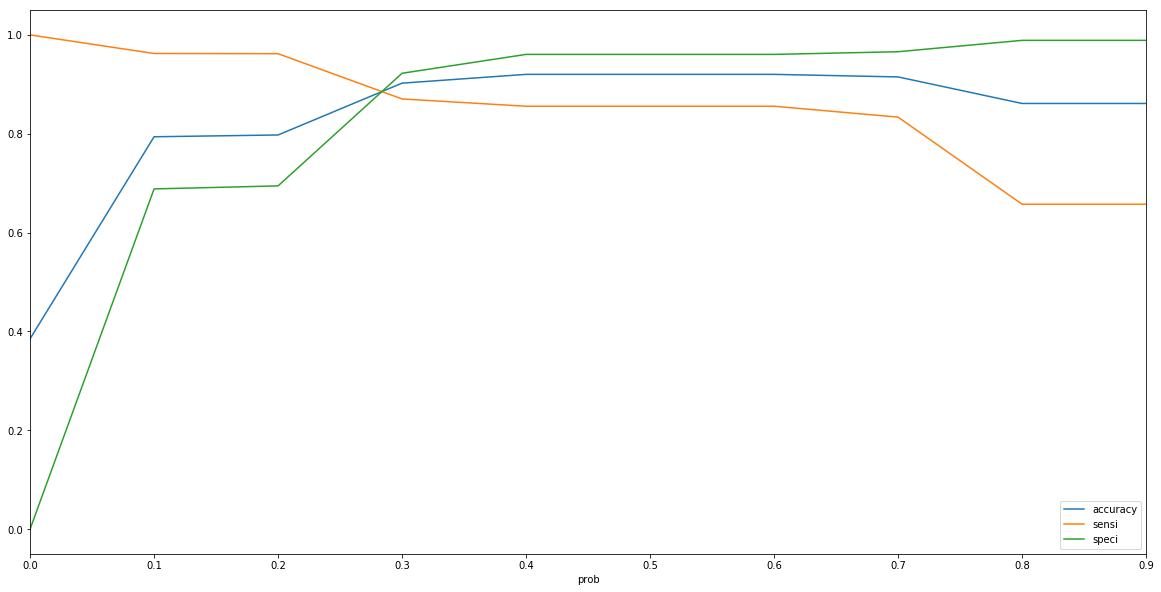

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.267033,3009,26.703289,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.267033,1012,26.703289,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.001628,9226,0.162783,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.723105,4750,72.310516,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.993500,7987,99.350001,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9023775783341206

In [149]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3602,  303],
       [ 317, 2129]], dtype=int64)

In [150]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [151]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8704006541291905

In [152]:
# Let us calculate specificity
TN / float(TN+FP)

0.9224071702944943

In [153]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.07759282970550577


In [154]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8754111842105263


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9191120183720337


## Precision and Recall

In [156]:
#Looking at the confusion matrix again

In [157]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3751,  154],
       [ 353, 2093]], dtype=int64)

##### Precision
TP / TP + FP

In [158]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9314641744548287

##### Recall
TP / TP + FN

In [159]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8556827473426002

Using sklearn utilities for the same

In [160]:
from sklearn.metrics import precision_score, recall_score

In [161]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9314641744548287

In [162]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8556827473426002

### Precision and recall tradeoff

In [163]:
from sklearn.metrics import precision_recall_curve

In [164]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [165]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

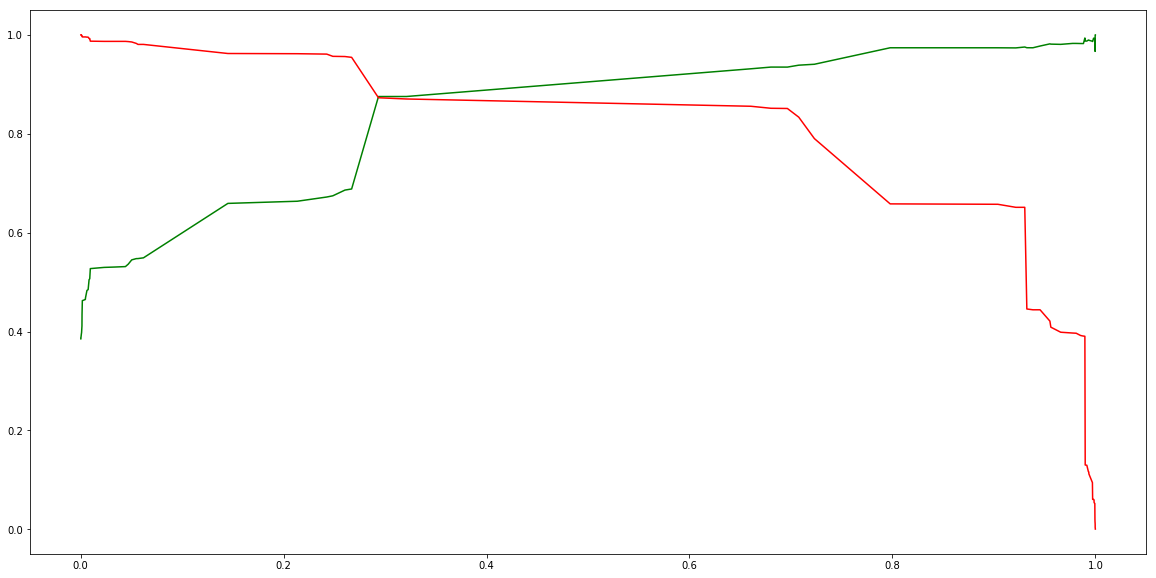

In [166]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 12: Making predictions on the test set

In [167]:
scale_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_test[scale_vars] = scaler.transform(X_test[scale_vars])

D:\NC\Training_Py\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
X_test = X_test[col4]
X_test.head()

,Welingak Website,SMS Sent,Busy,Closed by Horizzon,Lost to EINS,Ringing,Will revert after reading the email,switched off,Not Sure,Worst,Modified
3271,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,1,0,1,0,0
4216,0,0,0,1,0,0,0,0,0,0,1
3830,0,0,0,0,0,0,1,0,1,0,0


In [169]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [170]:
y_test_pred = res.predict(X_test_sm)

In [171]:
y_test_pred[:10]

3271    0.267033
1490    0.930431
7936    0.267033
4216    0.997113
3830    0.267033
1800    0.930431
6507    0.008927
4821    0.000644
4223    0.989677
4714    0.320991
dtype: float64

In [172]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [173]:
# Let's see the head
y_pred_1.head()

,0
3271,0.267033
1490,0.930431
7936,0.267033
4216,0.997113
3830,0.267033


In [174]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [175]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [176]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [177]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [178]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.267033
1,1,1490,0.930431
2,0,7936,0.267033
3,1,4216,0.997113
4,0,3830,0.267033


In [179]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [180]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [181]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.267033
1,1490,1,0.930431
2,7936,0,0.267033
3,4216,1,0.997113
4,3830,0,0.267033


##### Creating new column 'Lead Score' as Converted_Prob * 100.

In [182]:
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob * 100

# Let's see the head
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead Score
0,3271,0,0.267033,26.703289
1,1490,1,0.930431,93.043087
2,7936,0,0.267033,26.703289
3,4216,1,0.997113,99.711277
4,3830,0,0.267033,26.703289


In [183]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [184]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead Score,final_predicted
0,3271,0,0.267033,26.703289,0
1,1490,1,0.930431,93.043087,1
2,7936,0,0.267033,26.703289,0
3,4216,1,0.997113,99.711277,1
4,3830,0,0.267033,26.703289,0


In [185]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8953360264414248

In [186]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1598,  136],
       [ 149,  840]], dtype=int64)

In [187]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [188]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8493427704752275

In [189]:
# Let us calculate specificity
TN / float(TN+FP)

0.9215686274509803

### Step 13: Recommendations

As observed from the final model, we see that variables Welingak Website - Lead Source, SMS Sent, Busy, Closed by Horizzon, Lost to EINS, Will revert after reading the email all have positive coefficients. 
Therefore, the people with these features as true are the ones with high lead score and thus, will possibly be converted.

While the variables Ringing, Switched off, Not Sure, Worst and Modified all have negative coefficients. Therefore, the people with these features as true are the ones with low lead score and thus, are less likely to convert.

So the sales team should mainly focus on people with Lead Source from Welingak Website, Tags as Busy, Will revert after reading the email, Closed by Horizzon and Lost to EINS and Last Activity as SMS Sent to increase the conversion rate.